# **Import Libraries**

In [ ]:
# Importing all the libraries to be used

import nltk
import re
from nltk.corpus import stopwords
import string
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from textblob import TextBlob

# **Loading Data**

In [ ]:
df = pd.read_csv('/content/Bitext_Sample_Customer_Support_Training_Dataset_27K_responses-v11 (1).csv')
df.head()

,flags,instruction,category,intent,response
0,B,question about cancelling order {{Order Number}},ORDER,cancel_order,I've understood you have a question regarding ...
1,BQZ,i have a question about cancelling oorder {{Or...,ORDER,cancel_order,I've been informed that you have a question ab...
2,BLQZ,i need help cancelling puchase {{Order Number}},ORDER,cancel_order,I can sense that you're seeking assistance wit...
3,BL,I need to cancel purchase {{Order Number}},ORDER,cancel_order,I understood that you need assistance with can...
4,BCELN,"I cannot afford this order, cancel purchase {{...",ORDER,cancel_order,I'm sensitive to the fact that you're facing f...


Each **entry** in the dataset contains the following fields:

**flags**: tags (explained below in the Language Generation Tags section)


**instruction**: a **user request** from the Customer Service domain

**category**: the high-level semantic category for the intent

**intent**: the intent corresponding to the user instruction


**response**: an example expected response from the virtual assistant

**Categories and Intents**

The categories and intents covered by the dataset are:

**ACCOUNT**: create_account, delete_account, edit_account, switch_account

**CANCELLATION_FEE**: check_cancellation_fee

**DELIVERY**: delivery_options

**FEEDBACK**: complaint, review

**INVOICE**: check_invoice, get_invoice

**NEWSLETTER**: newsletter_subscription

**ORDER**: cancel_order, change_order, place_order

**PAYMENT**: check_payment_methods, payment_issue

**REFUND**: check_refund_policy, track_refund

**SHIPPING_ADDRESS**: change_shipping_address, set_up_shipping_address



---



The **entities** covered by the dataset are:

{{**Order Number**}},
typically present in:
*Intents*:

cancel_order, change_order, change_shipping_address, check_invoice, check_refund_policy, complaint, delivery_options, delivery_period, get_invoice, get_refund, place_order, track_order, track_refund


{{**Invoice Number**}}, typically present in:
*Intents*:
 check_invoice, get_invoice


{{**Online Order Interaction**}}, typically present in:
*Intents:* cancel_order, change_order, check_refund_policy, delivery_period, get_refund, review, track_order, track_refund


{{Online Payment Interaction}}, typically present in:
Intents: cancel_order, check_payment_methods


{{Online Navigation Step}}, typically present in:
Intents: complaint, delivery_options


{{Online Customer Support Channel}}, typically present in:

Intents: check_refund_policy, complaint, contact_human_agent, delete_account, delivery_options, edit_account, get_refund, payment_issue, registration_problems, switch_account


{{Profile}}, typically present in:

Intent: switch_account


{{Profile Type}}, typically present in:

Intent: switch_account


{{Settings}}, typically present in:

Intents: cancel_order, change_order, change_shipping_address, check_cancellation_fee, check_invoice, check_payment_methods, contact_human_agent, delete_account, delivery_options, edit_account, get_invoice, newsletter_subscription, payment_issue, place_order, recover_password, registration_problems, set_up_shipping_address, switch_account, track_order, track_refund


{{Online Company Portal Info}}, typically present in:
Intents: cancel_order, edit_account

{{Date}}, typically present in:
Intents: check_invoice, check_refund_policy, get_refund, track_order, track_refund


{{Date Range}}, typically present in:
Intents: check_cancellation_fee, check_invoice, get_invoice


{{Shipping Cut-off Time}}, typically present in:
Intent: delivery_options


{{Delivery City}}, typically present in:
Intent: delivery_options


{{Delivery Country}}, typically present in:
Intents: check_payment_methods, check_refund_policy, delivery_options, review, switch_account


{{Salutation}}, typically present in:
Intents: cancel_order, check_payment_methods, check_refund_policy, create_account, delete_account, delivery_options, get_refund, recover_password, review, set_up_shipping_address, switch_account, track_refund


{{Client First Name}}, typically present in:
Intents: check_invoice, get_invoice


{{Client Last Name}}, typically present in:
Intents: check_invoice, create_account, get_invoice


{{Customer Support Phone Number}}, typically present in:
Intents: change_shipping_address, contact_customer_service, contact_human_agent, payment_issue


{{Customer Support Email}}, typically present in:
Intents: cancel_order, change_shipping_address, check_invoice, check_refund_policy, complaint, contact_customer_service, contact_human_agent, get_invoice, get_refund, newsletter_subscription, payment_issue, recover_password, registration_problems, review, set_up_shipping_address, switch_account


{{Live Chat Support}}, typically present in:
Intents: check_refund_policy, complaint, contact_human_agent, delete_account, delivery_options, edit_account, get_refund, payment_issue, recover_password, registration_problems, review, set_up_shipping_address, switch_account, track_order


{{Website URL}}, typically present in:
Intents: check_payment_methods, check_refund_policy, complaint, contact_customer_service, contact_human_agent, create_account, delete_account, delivery_options, get_refund, newsletter_subscription, payment_issue, place_order, recover_password, registration_problems, review, switch_account


{{Upgrade Account}}, typically present in:
Intents: create_account, edit_account, switch_account


{{Account Type}}, typically present in:
Intents: cancel_order, change_order, change_shipping_address, check_cancellation_fee, check_invoice, check_payment_methods, check_refund_policy, complaint, contact_customer_service, contact_human_agent, create_account, delete_account, delivery_options, delivery_period, edit_account, get_invoice, get_refund, newsletter_subscription, payment_issue, place_order, recover_password, registration_problems, review, set_up_shipping_address, switch_account, track_order, track_refund


{{Account Category}}, typically present in:
Intents: cancel_order, change_order, change_shipping_address, check_cancellation_fee, check_invoice, check_payment_methods, check_refund_policy, complaint, contact_customer_service, contact_human_agent, create_account, delete_account, delivery_options, delivery_period, edit_account, get_invoice, get_refund, newsletter_subscription, payment_issue, place_order, recover_password, registration_problems, review, set_up_shipping_address, switch_account, track_order, track_refund


{{Account Change}}, typically present in:
Intent: switch_account


{{Program}}, typically present in:
Intent: place_order


{{Refund Amount}}, typically present in:
Intent: track_refund


{{Money Amount}}, typically present in:
Intents: check_refund_policy, complaint, get_refund, track_refund


{{Store Location}}, typically present in:
Intents: complaint, delivery_options, place_order



---



**Tags** for Lexical variation

M - Morphological variation: inflectional and derivational “is my SIM card active”, “is my SIM card activated”

L - Semantic variations: synonyms, use of hyphens, compounding… “what’s my billing date", “what’s my anniversary date”

Tags for Syntactic structure variation
B - Basic syntactic structure: “activate my SIM card”, “I need to activate my SIM card”

I - Interrogative structure “can you activate my SIM card?”, “how do I activate my SIM card?”

C - Coordinated syntactic structure “I have a new SIM card, what do I need to do to activate it?”

N - Negation “I do not want this item, where to cancel my order?”

Tags for language register variations
P - Politeness variation “could you help me activate my SIM card, please?”

Q - Colloquial variation “can u activ8 my SIM?”

W - Offensive language “I want to talk to a f&%g agent”

Tags for stylistic variations
K - Keyword mode "activate SIM", "new SIM"

E - Use of abbreviations: “I'm / I am interested in getting a new SIM”

Z - Errors and Typos: spelling issues, wrong punctuation… “how can i activaet my card”

Other tags not in use in this Dataset
D - Indirect speech “ask my agent to activate my SIM card”

G - Regional variations US English vs UK English: "truck" vs "lorry" France French vs Canadian French: "tchatter" vs "clavarder"

R - Respect structures - Language-dependent variations English: "may" vs "can…" French: "tu" vs "vous…" Spanish: "tú" vs "usted…"

Y - Code switching “activer ma SIM card”

In [ ]:
df.columns

Index(['flags', 'instruction', 'category', 'intent', 'response'], dtype='object')

In [ ]:
df.shape

(26872, 5)

In [ ]:
df.head()

,flags,instruction,category,intent,response
0,B,question about cancelling order {{Order Number}},ORDER,cancel_order,I've understood you have a question regarding ...
1,BQZ,i have a question about cancelling oorder {{Or...,ORDER,cancel_order,I've been informed that you have a question ab...
2,BLQZ,i need help cancelling puchase {{Order Number}},ORDER,cancel_order,I can sense that you're seeking assistance wit...
3,BL,I need to cancel purchase {{Order Number}},ORDER,cancel_order,I understood that you need assistance with can...
4,BCELN,"I cannot afford this order, cancel purchase {{...",ORDER,cancel_order,I'm sensitive to the fact that you're facing f...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26872 entries, 0 to 26871
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   flags        26872 non-null  object
 1   instruction  26872 non-null  object
 2   category     26872 non-null  object
 3   intent       26872 non-null  object
 4   response     26872 non-null  object
dtypes: object(5)
memory usage: 1.0+ MB


## Initial Exploring (the purpose is to select our target)

### intent or catgory

#### intent

In [ ]:
df['intent'].unique()

array(['cancel_order', 'change_order', 'change_shipping_address',
       'check_cancellation_fee', 'check_invoice', 'check_payment_methods',
       'check_refund_policy', 'complaint', 'contact_customer_service',
       'contact_human_agent', 'create_account', 'delete_account',
       'delivery_options', 'delivery_period', 'edit_account',
       'get_invoice', 'get_refund', 'newsletter_subscription',
       'payment_issue', 'place_order', 'recover_password',
       'registration_problems', 'review', 'set_up_shipping_address',
       'switch_account', 'track_order', 'track_refund'], dtype=object)

In [ ]:
df['intent'].value_counts()

,count
intent,
contact_customer_service,1000
complaint,1000
check_invoice,1000
switch_account,1000
edit_account,1000
contact_human_agent,999
check_payment_methods,999
delivery_period,999
newsletter_subscription,999


For each row, there is a corresponding **category** and **intent**.  

The **category** serves as the primary classification, while the **intent** acts as the sub-category, providing more specific details.

#### Category

In [ ]:
df.groupby('category')['intent'].value_counts()

category      intent                  
ACCOUNT       edit_account                1000
              switch_account              1000
              registration_problems        999
              create_account               997
              delete_account               995
              recover_password             995
CANCEL        check_cancellation_fee       950
CONTACT       contact_customer_service    1000
              contact_human_agent          999
DELIVERY      delivery_period              999
              delivery_options             995
FEEDBACK      complaint                   1000
              review                       997
INVOICE       check_invoice               1000
              get_invoice                  999
ORDER         cancel_order                 998
              place_order                  998
              change_order                 997
              track_order                  995
PAYMENT       check_payment_methods        999
              payment_issue                999
REFUND        track_refund                 998
              check_refund_policy          997
              get_refund                   997
SHIPPING      set_up_shipping_address      997
              change_shipping_address      973
SUBSCRIPTION  newsletter_subscription      999
Name: count, dtype: int64

Here, we aim to use **intent** as the target to understand the customer's needs based on their complaints, treating the instruction as the customer's message that needs to be classified accordingly.

# **Selcet_Important_Columns** ✅

In [ ]:
important_column = ['instruction','category','intent']
df = df[important_column]
df.head()

,instruction,category,intent
0,question about cancelling order {{Order Number}},ORDER,cancel_order
1,i have a question about cancelling oorder {{Or...,ORDER,cancel_order
2,i need help cancelling puchase {{Order Number}},ORDER,cancel_order
3,I need to cancel purchase {{Order Number}},ORDER,cancel_order
4,"I cannot afford this order, cancel purchase {{...",ORDER,cancel_order


# Exploring Data

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26872 entries, 0 to 26871
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   instruction  26872 non-null  object
 1   category     26872 non-null  object
 2   intent       26872 non-null  object
dtypes: object(3)
memory usage: 629.9+ KB


In [ ]:
df.shape

(26872, 3)

In [ ]:
df.columns

Index(['instruction', 'category', 'intent'], dtype='object')

In [ ]:
df.describe(include=['O'])

,instruction,category,intent
count,26872,26872,26872
unique,24635,11,27
top,shiping to {{Delivery City}},ACCOUNT,contact_customer_service
freq,8,5986,1000


In [ ]:
df.isnull().mean()*100

,0
instruction,0.0
category,0.0
intent,0.0


In [ ]:
df[df.duplicated()]

,instruction,category,intent
31,assistance with cancelling pucrhase {{Order Nu...,ORDER,cancel_order
35,can you help me cancel purchase {{Order Number}}?,ORDER,cancel_order
41,I have got to cancel purchase {{Order Number}},ORDER,cancel_order
55,assistance with canceling purchase {{Order Num...,ORDER,cancel_order
61,problem with cancelling order {{Order Number}},ORDER,cancel_order
...,...,...,...
26859,I expect a compensation of {{Currency Symbol}}...,REFUND,track_refund
26861,i expect a restitution of {{Refund Amount}} do...,REFUND,track_refund
26865,I'm waiting for a rebate of {{Refund Amount}} ...,REFUND,track_refund
26867,I am waiting for a rebate of {{Refund Amount}}...,REFUND,track_refund


In [ ]:
df.duplicated().sum()

np.int64(2237)

In [ ]:
df.shape

(26872, 3)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(24635, 3)

## 1.  Intent column 📊




In [ ]:
df['intent'].unique()

array(['cancel_order', 'change_order', 'change_shipping_address',
       'check_cancellation_fee', 'check_invoice', 'check_payment_methods',
       'check_refund_policy', 'complaint', 'contact_customer_service',
       'contact_human_agent', 'create_account', 'delete_account',
       'delivery_options', 'delivery_period', 'edit_account',
       'get_invoice', 'get_refund', 'newsletter_subscription',
       'payment_issue', 'place_order', 'recover_password',
       'registration_problems', 'review', 'set_up_shipping_address',
       'switch_account', 'track_order', 'track_refund'], dtype=object)

In [ ]:
df['intent'].value_counts()

,count
intent,
contact_customer_service,1000
complaint,1000
check_payment_methods,999
contact_human_agent,999
newsletter_subscription,999
payment_issue,999
delivery_period,999
registration_problems,999
place_order,998


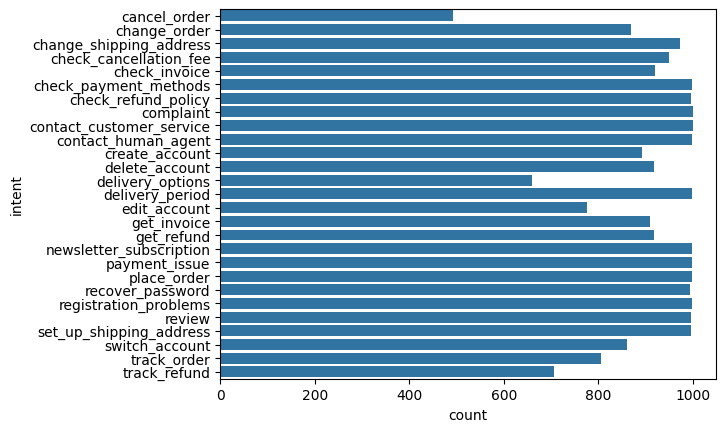

In [ ]:
sns.countplot(df['intent']) ;

The dataset exhibits imbalanced class labels.

## 2. Category Column 📊

In [ ]:
df['category'].unique()

array(['ORDER', 'SHIPPING', 'CANCEL', 'INVOICE', 'PAYMENT', 'REFUND',
       'FEEDBACK', 'CONTACT', 'ACCOUNT', 'DELIVERY', 'SUBSCRIPTION'],
      dtype=object)

In [ ]:
df['category'].value_counts()

,count
category,
ACCOUNT,5443
ORDER,3168
REFUND,2622
CONTACT,1999
PAYMENT,1998
FEEDBACK,1997
SHIPPING,1970
INVOICE,1830
DELIVERY,1659


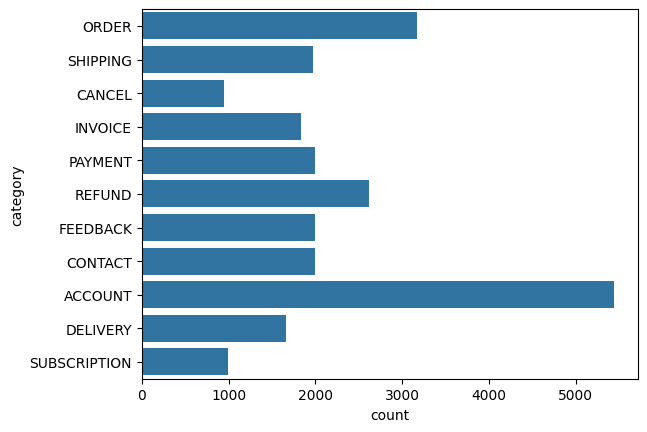

In [ ]:
sns.countplot(df['category']);

## Check duplicates

In [ ]:
df[df.duplicated()]['intent'].unique()

array([], dtype=object)

In [ ]:
df.columns

Index(['instruction', 'category', 'intent'], dtype='object')

In [ ]:
df['instruction'].head(5)

,instruction
0,question about cancelling order {{Order Number}}
1,i have a question about cancelling oorder {{Or...
2,i need help cancelling puchase {{Order Number}}
3,I need to cancel purchase {{Order Number}}
4,"I cannot afford this order, cancel purchase {{..."


## Cleaning Data

In [ ]:
df.shape

(24635, 2)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(24635, 2)

####  Concatenate Intent with Category   

In [ ]:
df.groupby('category')['intent'].value_counts()

category      intent                  
ACCOUNT       registration_problems        999
              recover_password             995
              delete_account               918
              create_account               892
              switch_account               862
              edit_account                 777
CANCEL        check_cancellation_fee       950
CONTACT       contact_customer_service    1000
              contact_human_agent          999
DELIVERY      delivery_period              999
              delivery_options             660
FEEDBACK      complaint                   1000
              review                       997
INVOICE       check_invoice                921
              get_invoice                  909
ORDER         place_order                  998
              change_order                 870
              track_order                  807
              cancel_order                 493
PAYMENT       check_payment_methods        999
              payment_issue                999
REFUND        check_refund_policy          997
              get_refund                   918
              track_refund                 707
SHIPPING      set_up_shipping_address      997
              change_shipping_address      973
SUBSCRIPTION  newsletter_subscription      999
Name: count, dtype: int64

In [ ]:
# Select the intentes you want to concatenate them with the main Category
categories_intents = {"ACCOUNT":['registration_problems' , 'recover_password'] , "FEEDBACK" : ["complaint","review"]}

def concatenate_intents(categories_intents,text) :
  for category,intent in categories_intents.items() :
    if text in intent :
        # print(text,intent,category)
        category = category.lower()
        text = category+"_"+text
        print(intent)
    else :
      continue

  return text


df['new_intent'] = df['intent'].apply(lambda x : concatenate_intents(categories_intents,x))


['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'review']
['complaint', 'r

In [ ]:
df.head()

,instruction,category,intent,new_intent
0,question about cancelling order {{Order Number}},ORDER,cancel_order,cancel_order
1,i have a question about cancelling oorder {{Or...,ORDER,cancel_order,cancel_order
2,i need help cancelling puchase {{Order Number}},ORDER,cancel_order,cancel_order
3,I need to cancel purchase {{Order Number}},ORDER,cancel_order,cancel_order
4,"I cannot afford this order, cancel purchase {{...",ORDER,cancel_order,cancel_order


In [ ]:
df['new_intent'].unique()

array(['cancel_order', 'change_order', 'change_shipping_address',
       'check_cancellation_fee', 'check_invoice', 'check_payment_methods',
       'check_refund_policy', 'feedback_complaint',
       'contact_customer_service', 'contact_human_agent',
       'create_account', 'delete_account', 'delivery_options',
       'delivery_period', 'edit_account', 'get_invoice', 'get_refund',
       'newsletter_subscription', 'payment_issue', 'place_order',
       'account_recover_password', 'account_registration_problems',
       'feedback_review', 'set_up_shipping_address', 'switch_account',
       'track_order', 'track_refund'], dtype=object)

In [ ]:
df.groupby('category')['new_intent'].value_counts()

category      new_intent                   
ACCOUNT       account_registration_problems     999
              account_recover_password          995
              delete_account                    918
              create_account                    892
              switch_account                    862
              edit_account                      777
CANCEL        check_cancellation_fee            950
CONTACT       contact_customer_service         1000
              contact_human_agent               999
DELIVERY      delivery_period                   999
              delivery_options                  660
FEEDBACK      feedback_complaint               1000
              feedback_review                   997
INVOICE       check_invoice                     921
              get_invoice                       909
ORDER         place_order                       998
              change_order                      870
              track_order                       807
              cancel_order                      493
PAYMENT       check_payment_methods             999
              payment_issue                     999
REFUND        check_refund_policy               997
              get_refund                        918
              track_refund                      707
SHIPPING      set_up_shipping_address           997
              change_shipping_address           973
SUBSCRIPTION  newsletter_subscription           999
Name: count, dtype: int64

In [ ]:
df.isnull().mean()*100

,0
instruction,0.0
category,0.0
intent,0.0
new_intent,0.0



# Text Preprocessing

## Return All text between {} ✅

In [ ]:
# import re

# # Assuming features is a pandas Series or DataFrame column
# def extract_curly_brace_content(text):
#     pattern = r'\{(.*?)\}'
#     matches = re.findall(pattern, str(text))  # Convert to string for safety
#     return str(matches)

# # Apply the function to the 'instruction' column
# df['extracted_content'] = df['instruction'].apply(extract_curly_brace_content)

In [ ]:
df.head()

,instruction,category,intent,new_intent
0,question about cancelling order,ORDER,cancel_order,cancel_order
1,i have a question about cancelling oorder,ORDER,cancel_order,cancel_order
2,i need help cancelling puchase,ORDER,cancel_order,cancel_order
3,I need to cancel purchase,ORDER,cancel_order,cancel_order
4,"I cannot afford this order, cancel purchase",ORDER,cancel_order,cancel_order


In [ ]:
# df['extracted_content'].unique()

Remove parts of the text that are not unique or informative, as they do not add value.

## Delete All text between {} ✅

In [ ]:
def remove_curly_braces(text):
  """Removes curly braces and their content from a string.

  Args:
    text: The input string.

  Returns:
    The string with curly braces and their content removed.
  """
  text = re.sub(r'\{\{.*?\}\}', '', text)
  return text

# Apply the function to the 'instruction' column
df['instruction'] = df['instruction'].apply(remove_curly_braces)

## making sure using return Function ✅

In [ ]:
df['extracted_content'] = df['instruction'].apply(extract_curly_brace_content)
df["extracted_content"].unique()

array(['[]'], dtype=object)

In [ ]:
df.isnull().mean()*100

,0
instruction,0.0
category,0.0
intent,0.0
new_intent,0.0
extracted_content,0.0


In [ ]:
df.drop(columns=['extracted_content'],inplace=True)

KeyError: "['extracted_content'] not found in axis"

In [ ]:
df.columns

Index(['instruction', 'category', 'intent', 'new_intent'], dtype='object')

In [ ]:
df.head()

,instruction,category,intent,new_intent
0,question about cancelling order,ORDER,cancel_order,cancel_order
1,i have a question about cancelling oorder,ORDER,cancel_order,cancel_order
2,i need help cancelling puchase,ORDER,cancel_order,cancel_order
3,I need to cancel purchase,ORDER,cancel_order,cancel_order
4,"I cannot afford this order, cancel purchase",ORDER,cancel_order,cancel_order


## Adding a column of numbers of charachters,words and sentences in each msg ✅


In [ ]:
df.columns

Index(['instruction', 'category', 'intent', 'new_intent'], dtype='object')

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Download the 'punkt' tokenizer
nltk.download('punkt')
#Adding a column of numbers of charachters,words and sentences in each msg
df["No_of_Characters"] = df["instruction"].apply(len)
df["No_of_Words"]=df.apply(lambda row: nltk.word_tokenize(row["instruction"]), axis=1).apply(len)
df["No_of_sentence"]=df.apply(lambda row: nltk.sent_tokenize(row["instruction"]), axis=1).apply(len)

df.describe().T

#PS. At this step, I tokenised the words and sentences and used the length of the same.
#More on Tokenizing later in the notebook.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,count,mean,std,min,25%,50%,75%,max
No_of_Characters,24635.0,43.961437,10.758208,6.0,37.0,45.0,53.0,60.0
No_of_Words,24635.0,8.888898,2.866894,1.0,7.0,9.0,11.0,17.0
No_of_sentence,24635.0,1.000203,0.014245,1.0,1.0,1.0,1.0,2.0


<Figure size 1200x800 with 0 Axes>

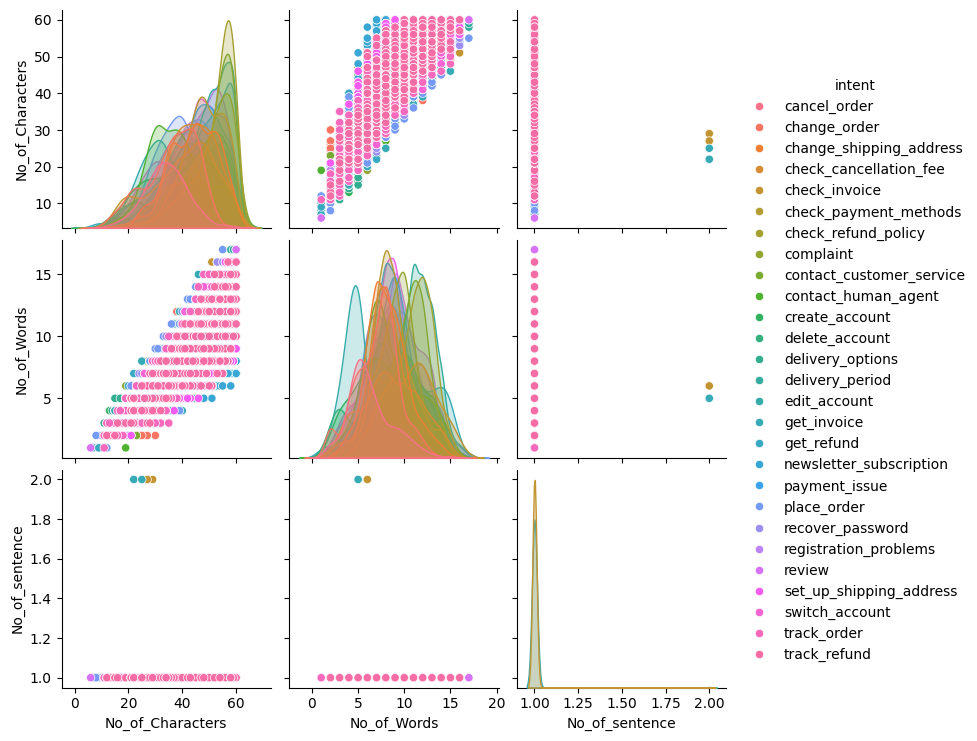

In [ ]:
# # cols= ["#E1F16B", "#E598D8"]
# plt.figure(figsize=(12,8))
# fg = sns.pairplot(data=df, hue="intent")
# plt.show(fg)

## Expanding Contraction ✅
{i'd like -> i would like }

In [ ]:
df.columns

Index(['instruction', 'category', 'intent', 'new_intent', 'No_of_Characters',
       'No_of_Words', 'No_of_sentence'],
      dtype='object')

In [ ]:
!pip install contractions==0.1.73
import contractions

def expand_contractions(text):
  """Expands contractions in a string.

  Args:
    text: The input string.

  Returns:
    The string with contractions expanded.
  """
  expanded_text = contractions.fix(text)
  return expanded_text

  df['instruction'] = df['instruction'].apply(expand_contractions)




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 11.4 MB/s eta 0:00:00


In [ ]:
df.head()

,instruction,category,intent,new_intent,No_of_Characters,No_of_Words,No_of_sentence
0,question about cancelling order,ORDER,cancel_order,cancel_order,32,4,1
1,i have a question about cancelling oorder,ORDER,cancel_order,cancel_order,42,7,1
2,i need help cancelling puchase,ORDER,cancel_order,cancel_order,31,5,1
3,I need to cancel purchase,ORDER,cancel_order,cancel_order,26,5,1
4,"I cannot afford this order, cancel purchase",ORDER,cancel_order,cancel_order,44,9,1


## Text Correction ✅

In [ ]:


def correct_spelling(text):
  """Corrects spelling mistakes in a string.

  Args:
    text: The input string.

  Returns:
    The string with spelling mistakes corrected.
  """
  blob = TextBlob(text)
  corrected_text = str(blob.correct())
  return corrected_text

df['instruction'] = df['instruction'].apply(correct_spelling)

## Removing Punctuation & Special Characters ✅

And remove parts of the text that are between {{}} as they are not unique or informative, as they do not add value.

In [ ]:
import nltk
import re
nltk.download('stopwords')
# stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))


def clean(text):
    text = str(text).lower()

    text = re.sub(r'\{\{.*?\}\}', '', text)
    text = text.split()
    text = ' '.join(text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    # text = [word for word in text.split(' ') if word not in stopword]
    # text=" ".join(text)
    # text = [stemmer.stem(word) for word in text.split(' ')]
    # text=" ".join(text)
    return text


df['clean_instruction']= df['instruction'].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df.head()

,instruction,category,intent,new_intent,No_of_Characters,No_of_Words,No_of_sentence,clean_instruction
0,question about concealing order,ORDER,cancel_order,cancel_order,32,4,1,question about concealing order
1,i have a question about concealing order,ORDER,cancel_order,cancel_order,42,7,1,i have a question about concealing order
2,i need help concealing purchase,ORDER,cancel_order,cancel_order,31,5,1,i need help concealing purchase
3,I need to cancel purchase,ORDER,cancel_order,cancel_order,26,5,1,i need to cancel purchase
4,"I cannot afford this order, cancel purchase",ORDER,cancel_order,cancel_order,44,9,1,i cannot afford this order cancel purchase


### Check the Special Charc ✅

In [ ]:
import re

def count_special_chars(text):
  """Counts the number of special characters in a string.

  Args:
    text: The input string.

  Returns:
    The number of special characters in the string.
  """
  special_chars = re.findall(r"[^a-zA-Z0-9\s]", text)
  return len(special_chars)

# Apply the function to your text data
df['special_char_count_in_instruction'] = df['instruction'].apply(count_special_chars)
df['special_char_count_in_clean_instruction'] = df['clean_instruction'].apply(count_special_chars)
#To see the output, run the code.

In [ ]:
df['special_char_count_in_instruction'].sum()

np.int64(9494)

In [ ]:
df['special_char_count_in_clean_instruction'].sum()

np.int64(0)

In [ ]:
df.drop(columns={'special_char_count_in_instruction',"special_char_count_in_clean_instruction"},inplace=True)

In [ ]:
df.columns

Index(['instruction', 'category', 'intent', 'new_intent', 'No_of_Characters',
       'No_of_Words', 'No_of_sentence', 'clean_instruction'],
      dtype='object')

### Check Numbers Existence ✅

In [ ]:
import pandas as pd
import re

def has_numbers(text):
    return bool(re.search(r'\d', text))

df['has_numbers_in_clean_instruction'] = df['clean_instruction'].apply(has_numbers)
df['has_numbers_in_instruction'] = df['instruction'].apply(has_numbers)

df[df['has_numbers_in_clean_instruction']=='True'].head()

,instruction,category,intent,new_intent,No_of_Characters,No_of_Words,No_of_sentence,clean_instruction,has_numbers_in_clean_instruction,has_numbers_in_instruction


In [ ]:
df['has_numbers_in_clean_instruction'].unique()

array([False])

In [ ]:
df[df['has_numbers_in_instruction']=='True'].head()

,instruction,category,intent,new_intent,No_of_Characters,No_of_Words,No_of_sentence,clean_instruction,has_numbers_in_clean_instruction,has_numbers_in_instruction


In [ ]:
df.drop(columns={'has_numbers_in_clean_instruction','has_numbers_in_instruction'},inplace=True)

##Word Tokenization ✅

In [ ]:
df.columns

Index(['instruction', 'category', 'intent', 'new_intent', 'No_of_Characters',
       'No_of_Words', 'No_of_sentence', 'clean_instruction'],
      dtype='object')

In [ ]:
df["tokenize_instruction"]=df.apply(lambda row: nltk.word_tokenize(row["clean_instruction"]), axis=1)

df.head(5)

,instruction,category,intent,new_intent,No_of_Characters,No_of_Words,No_of_sentence,clean_instruction,tokenize_instruction
0,question about concealing order,ORDER,cancel_order,cancel_order,32,4,1,question about concealing order,"[question, about, concealing, order]"
1,i have a question about concealing order,ORDER,cancel_order,cancel_order,42,7,1,i have a question about concealing order,"[i, have, a, question, about, concealing, order]"
2,i need help concealing purchase,ORDER,cancel_order,cancel_order,31,5,1,i need help concealing purchase,"[i, need, help, concealing, purchase]"
3,I need to cancel purchase,ORDER,cancel_order,cancel_order,26,5,1,i need to cancel purchase,"[i, need, to, cancel, purchase]"
4,"I cannot afford this order, cancel purchase",ORDER,cancel_order,cancel_order,44,9,1,i cannot afford this order cancel purchase,"[i, can, not, afford, this, order, cancel, pur..."


In [ ]:
df.tail()

,instruction,category,intent,new_intent,No_of_Characters,No_of_Words,No_of_sentence,clean_instruction,tokenize_instruction
26864,I have got to see my compensation current status,REFUND,track_refund,track_refund,48,9,1,i have got to see my compensation current status,"[i, have, got, to, see, my, compensation, curr..."
26866,check the current status of my compensation,REFUND,track_refund,track_refund,43,7,1,check the current status of my compensation,"[check, the, current, status, of, my, compensa..."
26868,how to see if there is anything wrong with my ...,REFUND,track_refund,track_refund,58,12,1,how to see if there is anything wrong with my ...,"[how, to, see, if, there, is, anything, wrong,..."
26870,I don't know what to do to see my reimbursemen...,REFUND,track_refund,track_refund,54,12,1,i dont know what to do to see my reimbursement...,"[i, dont, know, what, to, do, to, see, my, rei..."
26871,I need to know if there is anything new on the...,REFUND,track_refund,track_refund,58,12,1,i need to know if there is anything new on the...,"[i, need, to, know, if, there, is, anything, n..."


## Lemmatization ✅

In [ ]:
df.columns

Index(['instruction', 'category', 'intent', 'new_intent', 'No_of_Characters',
       'No_of_Words', 'No_of_sentence', 'clean_instruction',
       'tokenize_instruction'],
      dtype='object')

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
lemmatizer = WordNetLemmatizer()

# lemmatize string
def lemmatize_word(text):
    #word_tokens = word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in text]
    lemmas = [lemmatizer.lemmatize(word, pos ='a') for word in text]
    lemmas = [lemmatizer.lemmatize(word, pos ='r') for word in text]
    lemmas = [lemmatizer.lemmatize(word, pos ='s') for word in text]
    lemmas = [lemmatizer.lemmatize(word, pos ='n') for word in text]

    return lemmas

df["lemmatized_instruction"] = df['tokenize_instruction'].apply(lemmatize_word)
df.head(5)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,instruction,category,intent,new_intent,No_of_Characters,No_of_Words,No_of_sentence,clean_instruction,tokenize_instruction,lemmatized_instruction
0,question about concealing order,ORDER,cancel_order,cancel_order,32,4,1,question about concealing order,"[question, about, concealing, order]","[question, about, concealing, order]"
1,i have a question about concealing order,ORDER,cancel_order,cancel_order,42,7,1,i have a question about concealing order,"[i, have, a, question, about, concealing, order]","[i, have, a, question, about, concealing, order]"
2,i need help concealing purchase,ORDER,cancel_order,cancel_order,31,5,1,i need help concealing purchase,"[i, need, help, concealing, purchase]","[i, need, help, concealing, purchase]"
3,I need to cancel purchase,ORDER,cancel_order,cancel_order,26,5,1,i need to cancel purchase,"[i, need, to, cancel, purchase]","[i, need, to, cancel, purchase]"
4,"I cannot afford this order, cancel purchase",ORDER,cancel_order,cancel_order,44,9,1,i cannot afford this order cancel purchase,"[i, can, not, afford, this, order, cancel, pur...","[i, can, not, afford, this, order, cancel, pur..."


In [ ]:
df.tail()

,instruction,category,intent,new_intent,No_of_Characters,No_of_Words,No_of_sentence,clean_instruction,tokenize_instruction,lemmatized_instruction
26864,I have got to see my compensation current status,REFUND,track_refund,track_refund,48,9,1,i have got to see my compensation current status,"[i, have, got, to, see, my, compensation, curr...","[i, have, got, to, see, my, compensation, curr..."
26866,check the current status of my compensation,REFUND,track_refund,track_refund,43,7,1,check the current status of my compensation,"[check, the, current, status, of, my, compensa...","[check, the, current, status, of, my, compensa..."
26868,how to see if there is anything wrong with my ...,REFUND,track_refund,track_refund,58,12,1,how to see if there is anything wrong with my ...,"[how, to, see, if, there, is, anything, wrong,...","[how, to, see, if, there, is, anything, wrong,..."
26870,I don't know what to do to see my reimbursemen...,REFUND,track_refund,track_refund,54,12,1,i dont know what to do to see my reimbursement...,"[i, dont, know, what, to, do, to, see, my, rei...","[i, dont, know, what, to, do, to, see, my, rei..."
26871,I need to know if there is anything new on the...,REFUND,track_refund,track_refund,58,12,1,i need to know if there is anything new on the...,"[i, need, to, know, if, there, is, anything, n...","[i, need, to, know, if, there, is, anything, n..."


## Remove stopwords ✅

In [ ]:
df.columns

Index(['instruction', 'category', 'intent', 'new_intent', 'No_of_Characters',
       'No_of_Words', 'No_of_sentence', 'clean_instruction',
       'tokenize_instruction', 'lemmatized_instruction'],
      dtype='object')

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Keep some words that affect classification.

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')  # Make sure you've downloaded the stopwords

def remove_stopwords(text):
    # Renamed variable to 'stop_word_set'
    stop_word_set = set(stopwords.words("english"))
    essential_words = {'not', 'no', 'cannot','dont'}
    custom_stop_words = stop_word_set - essential_words
    filtered_text = [word for word in text if word not in custom_stop_words]
    return filtered_text

df["nostopword_instruction"] = df["lemmatized_instruction"].apply(remove_stopwords)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,instruction,category,intent,new_intent,No_of_Characters,No_of_Words,No_of_sentence,clean_instruction,tokenize_instruction,lemmatized_instruction,nostopword_instruction
0,question about concealing order,ORDER,cancel_order,cancel_order,32,4,1,question about concealing order,"[question, about, concealing, order]","[question, about, concealing, order]","[question, concealing, order]"
1,i have a question about concealing order,ORDER,cancel_order,cancel_order,42,7,1,i have a question about concealing order,"[i, have, a, question, about, concealing, order]","[i, have, a, question, about, concealing, order]","[question, concealing, order]"
2,i need help concealing purchase,ORDER,cancel_order,cancel_order,31,5,1,i need help concealing purchase,"[i, need, help, concealing, purchase]","[i, need, help, concealing, purchase]","[need, help, concealing, purchase]"
3,I need to cancel purchase,ORDER,cancel_order,cancel_order,26,5,1,i need to cancel purchase,"[i, need, to, cancel, purchase]","[i, need, to, cancel, purchase]","[need, cancel, purchase]"
4,"I cannot afford this order, cancel purchase",ORDER,cancel_order,cancel_order,44,9,1,i cannot afford this order cancel purchase,"[i, can, not, afford, this, order, cancel, pur...","[i, can, not, afford, this, order, cancel, pur...","[not, afford, order, cancel, purchase]"


In [ ]:
df.tail()

,instruction,category,intent,new_intent,No_of_Characters,No_of_Words,No_of_sentence,clean_instruction,tokenize_instruction,lemmatized_instruction,nostopword_instruction
26864,I have got to see my compensation current status,REFUND,track_refund,track_refund,48,9,1,i have got to see my compensation current status,"[i, have, got, to, see, my, compensation, curr...","[i, have, got, to, see, my, compensation, curr...","[got, see, compensation, current, status]"
26866,check the current status of my compensation,REFUND,track_refund,track_refund,43,7,1,check the current status of my compensation,"[check, the, current, status, of, my, compensa...","[check, the, current, status, of, my, compensa...","[check, current, status, compensation]"
26868,how to see if there is anything wrong with my ...,REFUND,track_refund,track_refund,58,12,1,how to see if there is anything wrong with my ...,"[how, to, see, if, there, is, anything, wrong,...","[how, to, see, if, there, is, anything, wrong,...","[see, anything, wrong, restitution]"
26870,I don't know what to do to see my reimbursemen...,REFUND,track_refund,track_refund,54,12,1,i dont know what to do to see my reimbursement...,"[i, dont, know, what, to, do, to, see, my, rei...","[i, dont, know, what, to, do, to, see, my, rei...","[dont, know, see, reimbursement, status]"
26871,I need to know if there is anything new on the...,REFUND,track_refund,track_refund,58,12,1,i need to know if there is anything new on the...,"[i, need, to, know, if, there, is, anything, n...","[i, need, to, know, if, there, is, anything, n...","[need, know, anything, new, restitution]"


## Most Frequent Words ✅

### 1. Show the Word Cloud

In [ ]:
df.head()

,instruction,category,intent,new_intent,No_of_Characters,No_of_Words,No_of_sentence,clean_instruction,tokenize_instruction,lemmatized_instruction,nostopword_instruction
0,question about concealing order,ORDER,cancel_order,cancel_order,32,4,1,question about concealing order,"[question, about, concealing, order]","[question, about, concealing, order]","[question, concealing, order]"
1,i have a question about concealing order,ORDER,cancel_order,cancel_order,42,7,1,i have a question about concealing order,"[i, have, a, question, about, concealing, order]","[i, have, a, question, about, concealing, order]","[question, concealing, order]"
2,i need help concealing purchase,ORDER,cancel_order,cancel_order,31,5,1,i need help concealing purchase,"[i, need, help, concealing, purchase]","[i, need, help, concealing, purchase]","[need, help, concealing, purchase]"
3,I need to cancel purchase,ORDER,cancel_order,cancel_order,26,5,1,i need to cancel purchase,"[i, need, to, cancel, purchase]","[i, need, to, cancel, purchase]","[need, cancel, purchase]"
4,"I cannot afford this order, cancel purchase",ORDER,cancel_order,cancel_order,44,9,1,i cannot afford this order cancel purchase,"[i, can, not, afford, this, order, cancel, pur...","[i, can, not, afford, this, order, cancel, pur...","[not, afford, order, cancel, purchase]"


#### Update stopwords in wordcloud

question concealing order question concealing order need help concealing purchase need cancel purchase not afford order cancel purchase help cancel order no longer afford order cancel trying cancel purchase got cancel purchase need help concealing purchase dont know cancel order problem concealing purchase problem concealing purchase help concealing order help concealing purchase help cancel purchase cancel purchase bought item twice cancel order need help concealing order want assistance concealing order im trying cancel order problem concealing order assistance concealing purchase need help concealing purchase help concealing order want assistance concealing order need assistance concealing order problem concealing order assistance concealing order problem concealing order need help concealing purchase want assistance cancel order not know cancel purchase need assistance cancel order no longer afford purchase need assistance concealing purchase would like cancel purchase not want art

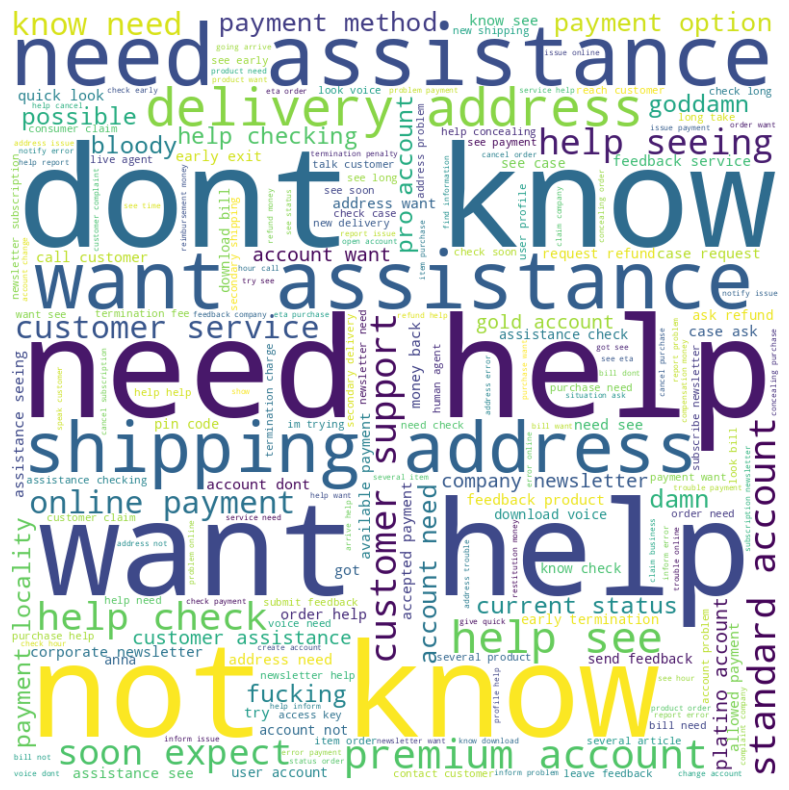

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Assuming 'df' is your DataFrame with the 'nostopword_instruction' column
text = " ".join(word for sublist in df['nostopword_instruction'] for word in sublist)  # Assuming it's a list of lists
print(text)


stopwords = set(STOPWORDS)
essential_words = {'not', 'no', 'cannot'}
custom_stop_words = stopwords - essential_words
plt.figure(figsize=(15, 10))
wordcloud = WordCloud(stopwords=custom_stop_words, background_color="white", width=800, height=800).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

It provides a general intuition, but it does not allow for comparison or highlight differences in word frequency.

### 2. Bar Chart

In [ ]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
corpus = [word for i in df['nostopword_instruction'] for word in i if word not in stop]

In [ ]:
corpus

['question',
 'concealing',
 'order',
 'question',
 'concealing',
 'order',
 'need',
 'help',
 'concealing',
 'purchase',
 'need',
 'cancel',
 'purchase',
 'afford',
 'order',
 'cancel',
 'purchase',
 'help',
 'cancel',
 'order',
 'longer',
 'afford',
 'order',
 'cancel',
 'trying',
 'cancel',
 'purchase',
 'got',
 'cancel',
 'purchase',
 'need',
 'help',
 'concealing',
 'purchase',
 'dont',
 'know',
 'cancel',
 'order',
 'problem',
 'concealing',
 'purchase',
 'problem',
 'concealing',
 'purchase',
 'help',
 'concealing',
 'order',
 'help',
 'concealing',
 'purchase',
 'help',
 'cancel',
 'purchase',
 'cancel',
 'purchase',
 'bought',
 'item',
 'twice',
 'cancel',
 'order',
 'need',
 'help',
 'concealing',
 'order',
 'want',
 'assistance',
 'concealing',
 'order',
 'im',
 'trying',
 'cancel',
 'order',
 'problem',
 'concealing',
 'order',
 'assistance',
 'concealing',
 'purchase',
 'need',
 'help',
 'concealing',
 'purchase',
 'help',
 'concealing',
 'order',
 'want',
 'assistance',
 

In [ ]:
from nltk.probability import FreqDist
most_common= FreqDist(corpus).most_common(10)
most_common

[('help', 6461),
 ('need', 3973),
 ('account', 3312),
 ('want', 3063),
 ('assistance', 2999),
 ('know', 2643),
 ('see', 2491),
 ('check', 2041),
 ('payment', 2010),
 ('address', 2000),
 ('order', 1450),
 ('dont', 1414),
 ('customer', 1274),
 ('purchase', 1224),
 ('delivery', 1102),
 ('shipping', 1042),
 ('newsletter', 992),
 ('product', 985),
 ('problem', 942),
 ('bill', 913)]

In [ ]:
corpus_set=set(corpus)
len(corpus_set)

877

Initially, we can say that our vocabulary consists of **877** unique words.

In [ ]:
len(corpus)

104051

In [ ]:
words , frequency = [] , []
for word, count in most_common:
    words.append(word)
    frequency.append(count)

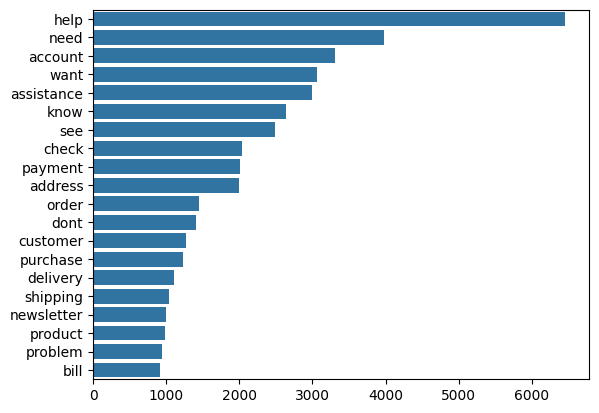

In [ ]:
sns.barplot(x=frequency,y=words) ;

## Least common words

In [ ]:
# Get the 10 least common words (or change the number as needed)
least_common = FreqDist(corpus).most_common()[:-21:-1]
print(least_common)

[('nay', 1), ('pressed', 1), ('reimbursmeent', 1), ('respect', 1), ('reimbursxement', 1), ('reimburswment', 1), ('reimbjrsement', 1), ('delicate', 1), ('local', 1), ('locke', 1), ('state', 1), ('teeth', 1), ('late', 1), ('star', 1), ('seeingorder', 1), ('recorder', 1), ('petya', 1), ('location', 1), ('stage', 1), ('cancheck', 1)]


In [ ]:
fdist = FreqDist(corpus) # Assuming 'corpus' is your list of words

In [ ]:
words_with_count_3 = [word for word in fdist if fdist[word] <= 3]

In [ ]:
print(words_with_count_3)
   # or use the 'words_with_count_1' list for further analysis

['include', 'si', 'chosen', 'deliveryaddress', 'headdress', 'thecally', 'youhelp', 'invoicesfrom', 'ball', 'involve', 'year', 'knowwhat', 'nine', 'paymentmethods', 'portion', 'donknow', 'neck', 'situationscan', 'refundable', 'plain', 'customerservice', 'transferring', 'parent', 'directing', 'drive', 'mt', 'needhelp', 'ho', 'reimbursing', 'companynewsletter', 'scant', 'isnt', 'cancer', 'havegot', 'parceling', 'cancelliung', 'mixed', 'debt', 'ii', 'ten', 'moreabout', 'tissue', 'credit', 'wantassistance', 'shining', 'thing', 'wannasee', 'canuhelp', 'checkthe', 'ionvoice', 'invoicefrom', 'checkbill', 'invoke', 'three', 'involves', 'five', 'june', 'seen', 'invoicr', 'eight', 'invoicce', 'smith', 'december', 'modaliites', 'helpchecking', 'acceptedpayment', 'showman', 'royalty', 'round', 'refuse', 'motto', 'entitled', 'reinbursements', 'howling', 'somehelp', 'reimbirsements', 'consume', 'dissatisfied', 'extremely', 'terrible', 'wanthelp', 'anybody', 'whathours', 'contactcustomer', 'working', 

In [ ]:
len(set(words_with_count_3))

465

In [ ]:
len((words_with_count_3))

465

### drop words if them frequency <= 3

In [ ]:
def remove_low_frequency_words(text_list, low_frequency_words):
    """Removes words with frequency 3 or less from a list of words.

    Args:
        text_list: The list of words (tokens).
        low_frequency_words: The list of low-frequency words to be removed.

    Returns:
        The filtered list of words.
    """
    # print(text_list)

    filtered_text = [word for word in text_list if word not in low_frequency_words]
    # print(filtered_text)
    return filtered_text


df["most_frequent_instruction"] = df["nostopword_instruction"].apply(lambda x: remove_low_frequency_words(x, words_with_count_3))

In [ ]:
df.head()

,instruction,category,intent,new_intent,No_of_Characters,No_of_Words,No_of_sentence,clean_instruction,tokenize_instruction,lemmatized_instruction,nostopword_instruction,most_frequent_instruction
0,question about concealing order,ORDER,cancel_order,cancel_order,32,4,1,question about concealing order,"[question, about, concealing, order]","[question, about, concealing, order]","[question, concealing, order]","[question, concealing, order]"
1,i have a question about concealing order,ORDER,cancel_order,cancel_order,42,7,1,i have a question about concealing order,"[i, have, a, question, about, concealing, order]","[i, have, a, question, about, concealing, order]","[question, concealing, order]","[question, concealing, order]"
2,i need help concealing purchase,ORDER,cancel_order,cancel_order,31,5,1,i need help concealing purchase,"[i, need, help, concealing, purchase]","[i, need, help, concealing, purchase]","[need, help, concealing, purchase]","[need, help, concealing, purchase]"
3,I need to cancel purchase,ORDER,cancel_order,cancel_order,26,5,1,i need to cancel purchase,"[i, need, to, cancel, purchase]","[i, need, to, cancel, purchase]","[need, cancel, purchase]","[need, cancel, purchase]"
4,"I cannot afford this order, cancel purchase",ORDER,cancel_order,cancel_order,44,9,1,i cannot afford this order cancel purchase,"[i, can, not, afford, this, order, cancel, pur...","[i, can, not, afford, this, order, cancel, pur...","[not, afford, order, cancel, purchase]","[not, afford, order, cancel, purchase]"


In [ ]:
df.isnull().mean()*100

,0
instruction,0.0
category,0.0
intent,0.0
new_intent,0.0
No_of_Characters,0.0
No_of_Words,0.0
No_of_sentence,0.0
clean_instruction,0.0
tokenize_instruction,0.0
lemmatized_instruction,0.0


# Text Representation

from here we will work on : most_frequent_instruction as is our curpos

In [ ]:
df.columns


Index(['instruction', 'category', 'intent', 'new_intent', 'No_of_Characters',
       'No_of_Words', 'No_of_sentence', 'clean_instruction',
       'tokenize_instruction', 'lemmatized_instruction',
       'nostopword_instruction', 'most_frequent_instruction'],
      dtype='object')

## Vectorization

## Split Data First

In [ ]:
df2 = df[['most_frequent_instruction','new_intent']]

In [ ]:
df2['most_frequent_instruction'] = df2['most_frequent_instruction'].apply(lambda x: ' '.join(x))

In [ ]:
df2.head()

,most_frequent_instruction,new_intent
0,question concealing order,cancel_order
1,question concealing order,cancel_order
2,need help concealing purchase,cancel_order
3,need cancel purchase,cancel_order
4,not afford order cancel purchase,cancel_order


In [ ]:
df2.isnull().mean()*100

,0
most_frequent_instruction,0.0
new_intent,0.0


In [ ]:
df2.to_csv("befor_vectorization.csv",index=False)

In [ ]:
x = df2['most_frequent_instruction']
y = df2['new_intent']

In [ ]:
x.head()

,most_frequent_instruction
0,question concealing order
1,question concealing order
2,need help concealing purchase
3,need cancel purchase
4,not afford order cancel purchase


In [ ]:
x.info()

<class 'pandas.core.series.Series'>
Index: 24635 entries, 0 to 26871
Series name: most_frequent_instruction
Non-Null Count  Dtype 
--------------  ----- 
24635 non-null  object
dtypes: object(1)
memory usage: 384.9+ KB


In [ ]:
x.isnull().mean()*100

np.float64(0.0)

In [ ]:
x[x.isnull()==True]

,most_frequent_instruction


In [ ]:
x.dropna(inplace=True)

In [ ]:
x.head()

,most_frequent_instruction
0,question concealing order
1,question concealing order
2,need help concealing purchase
3,need cancel purchase
4,not afford order cancel purchase


In [ ]:
x.info()

<class 'pandas.core.series.Series'>
Index: 24635 entries, 0 to 26871
Series name: most_frequent_instruction
Non-Null Count  Dtype 
--------------  ----- 
24635 non-null  object
dtypes: object(1)
memory usage: 384.9+ KB


In [ ]:
y.head()

,new_intent
0,cancel_order
1,cancel_order
2,cancel_order
3,cancel_order
4,cancel_order


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Frequency-based Embedding (applied on df2)

#### Bag of words (Count vectorizer)

#### N-Gram

In [ ]:
x_train

,most_frequent_instruction
20197,recover pin user
11180,want assistance meeting standard account
14614,not know edit damn account
10845,not know create standard account
24879,need help check eta purchase
...,...
23195,trouble setting secondary shipping address
6101,im trying see case request refund
1392,correcting order
17415,try receive newsletter


In [ ]:
x_train.isnull().mean()*100

np.float64(0.0)

In [ ]:
x_train[x_train.isnull()]

,most_frequent_instruction


In [ ]:
vectorizer = CountVectorizer(ngram_range=(1,2))
x_train_bow = vectorizer.fit_transform(x_train)
x_test_bow = vectorizer.transform(x_test)

x_train_bow_dense = x_train_bow.toarray()
feature_names = vectorizer.get_feature_names_out()
bow_df = pd.DataFrame(x_train_bow_dense, columns=feature_names)

display(bow_df)


,accept,accept card,accept help,accept need,accepted,accepted help,accepted payment,access,access key,account,...,yet,yet assistance,yet could,yet end,yet got,yet help,yet need,yet open,yet try,yet want
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19704,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19705,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19706,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
bow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19708 entries, 0 to 19707
Columns: 4997 entries, accept to yet want
dtypes: int64(4997)
memory usage: 751.3 MB


In [ ]:
from nltk import ngrams # For generating n-grams
from nltk import word_tokenize

In [ ]:
def generate_ngrams(text, n):
  """Generates n-grams from a string.

  Args:
    text: The input string.
    n: The desired n-gram size.

  Returns:
    A list of n-grams.
  """
  tokens = word_tokenize(text)  # Tokenize the string
  n_grams = ngrams(tokens, n)
  return [' '.join(grams) for grams in n_grams]  # Join tokens to create phrases

In [ ]:
df2['bi_grams'] = df2['most_frequent_instruction'].apply(lambda x: generate_ngrams(x, 2))
df2['tri_grams'] = df2['most_frequent_instruction'].apply(lambda x: generate_ngrams(x, 3))

In [ ]:
df2.head()

,most_frequent_instruction,new_intent,bi_grams,tri_grams
0,question concealing order,cancel_order,"[question concealing, concealing order]",[question concealing order]
1,question concealing order,cancel_order,"[question concealing, concealing order]",[question concealing order]
2,need help concealing purchase,cancel_order,"[need help, help concealing, concealing purchase]","[need help concealing, help concealing purchase]"
3,need cancel purchase,cancel_order,"[need cancel, cancel purchase]",[need cancel purchase]
4,not afford order cancel purchase,cancel_order,"[not afford, afford order, order cancel, cance...","[not afford order, afford order cancel, order ..."


##### plot the most grams appers ✅

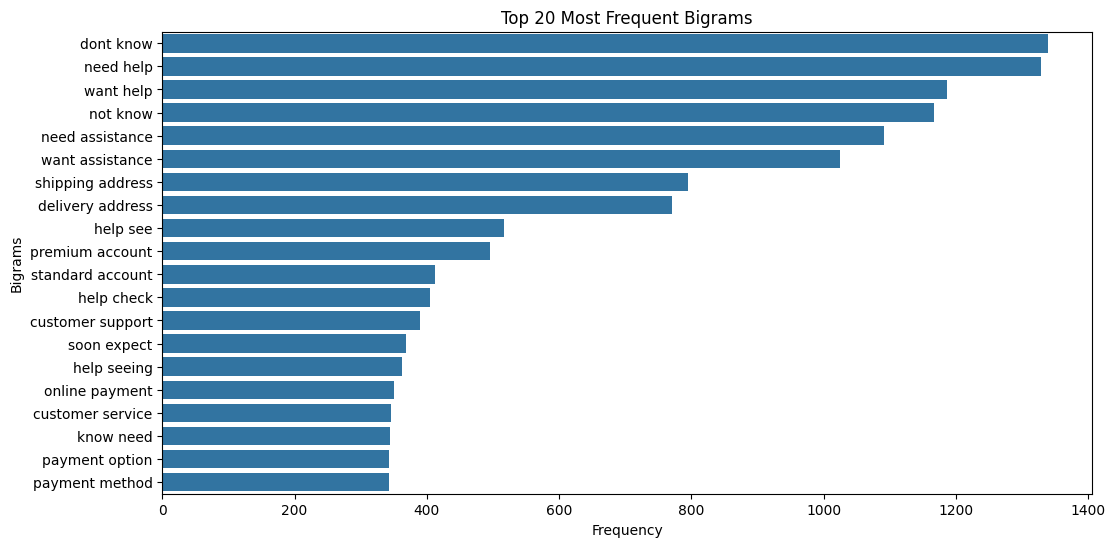

In [ ]:
from collections import Counter

# 1. Combine all bigrams into a single list
all_bigrams = []
for bigram_list in df2['bi_grams']:
    all_bigrams.extend(bigram_list)

# 2. Count the frequency of each bigram
bigram_freq = Counter(all_bigrams)

# 3. Get the most frequent bigrams
# (e.g., top 20, change the number as needed)
top_bigrams = bigram_freq.most_common(20)

# 4. Separate bigrams and their frequencies for plotting
bigrams, frequencies = zip(*top_bigrams)

# 5. Create the bar chart using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Adjust figure size
sns.barplot(x=frequencies, y=bigrams)
plt.title('Top 20 Most Frequent Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.show()

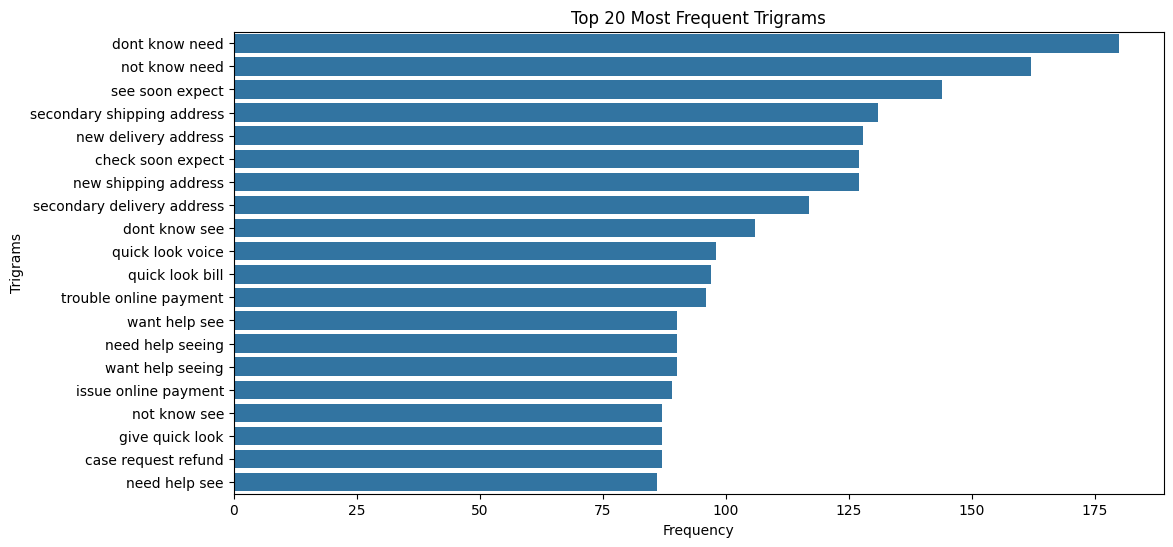

In [ ]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Combine all trigrams into a single list
all_trigrams = []
for trigram_list in df2['tri_grams']:
    all_trigrams.extend(trigram_list)

# 2. Count the frequency of each trigram
trigram_freq = Counter(all_trigrams)

# 3. Get the most frequent trigrams
top_trigrams = trigram_freq.most_common(20)

# 4. Separate trigrams and their frequencies for plotting
trigrams, frequencies = zip(*top_trigrams)

# 5. Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=frequencies, y=trigrams)
plt.title('Top 20 Most Frequent Trigrams')
plt.xlabel('Frequency')
plt.ylabel('Trigrams')
plt.show()

#### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

x_train_tfidf_dense =x_train_tfidf.toarray()

feature_names = vectorizer.get_feature_names_out()
train_tfidf_df = pd.DataFrame(x_train_tfidf_dense,columns = feature_names)

In [ ]:
train_tfidf_df.head()

,accept,accepted,access,account,accountfor,acquire,acquiring,add,adding,address,...,went,wife,withdrawal,word,work,would,write,writing,wrong,yet
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.294539,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.319738,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.322300,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_tfidf_df['accept'].unique()

array([0.        , 0.77439915, 0.63199295, 0.71002153, 0.69173248,
       0.64989701, 0.70534033, 0.649324  , 0.66869839, 0.66626126,
       0.733125  , 0.72469443, 0.72797516, 0.69400228, 0.66642106,
       0.6011341 , 0.58971848, 0.56122201, 0.55610807, 0.72977447,
       0.70116607, 0.67171026, 0.65944742, 0.84532556, 0.65770983,
       0.64951285, 0.54939921, 0.64847281, 0.67893772, 0.64417757,
       0.68359194, 0.66880799, 0.55398869, 0.70836408])

##### Visualize the data distribution across different classes 📊

In [ ]:
train_tfidf_df['new_intent'] = y_train

In [ ]:
# Top TF-IDF Words Per Class
grouped = train_tfidf_df.groupby('new_intent').mean()
top_n = 10
top_words_per_class = {}
for category in grouped.index:
    sorted_words = grouped.loc[category].sort_values(ascending=False)
    top_words_per_class[category] = sorted_words.head(top_n)

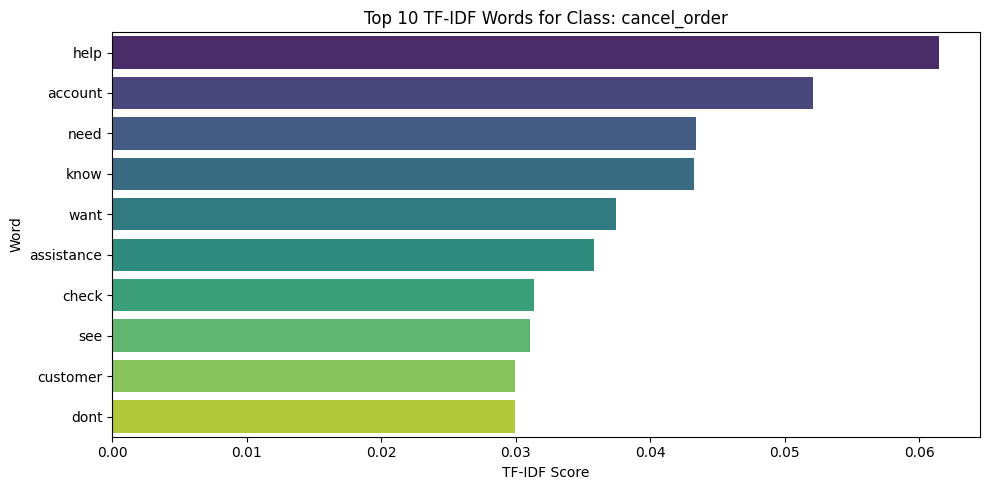

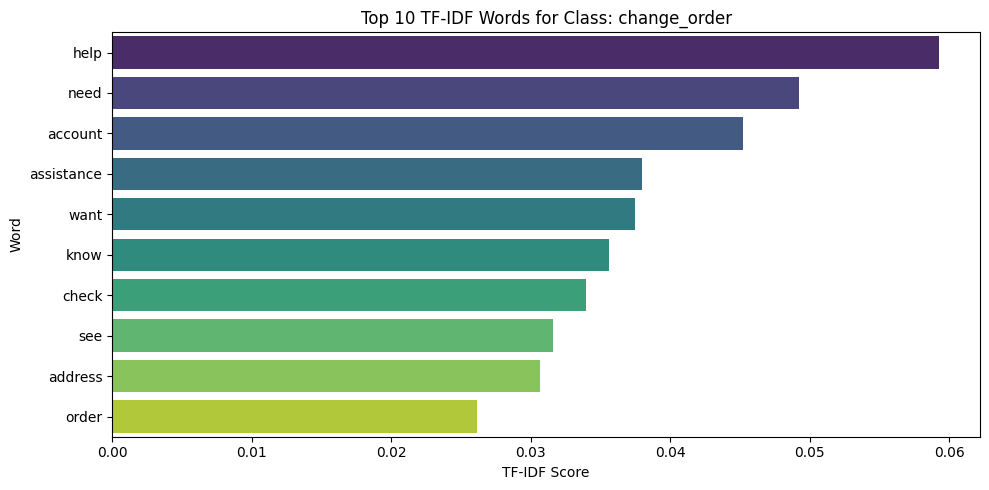

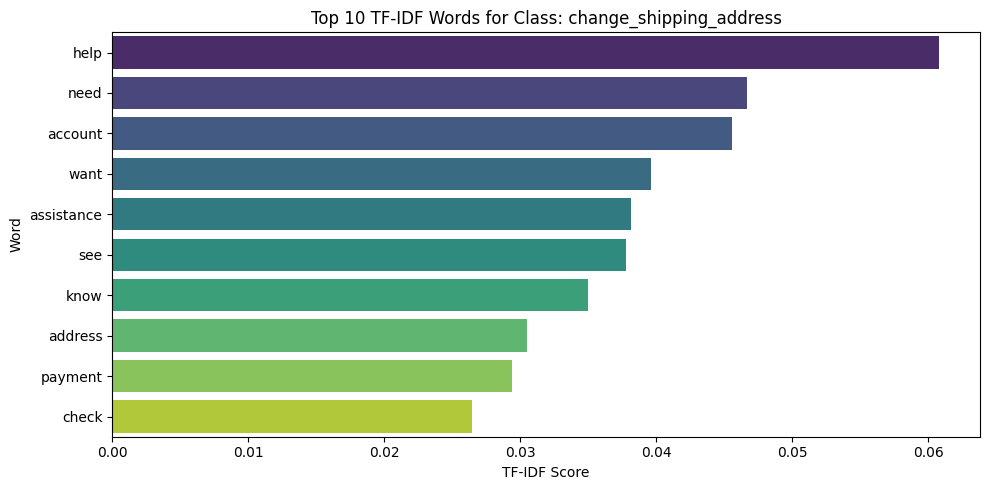

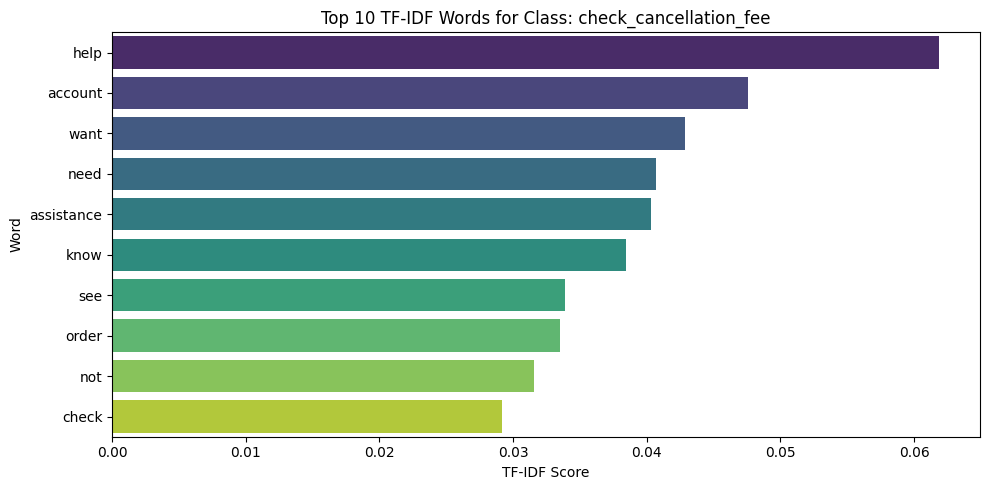

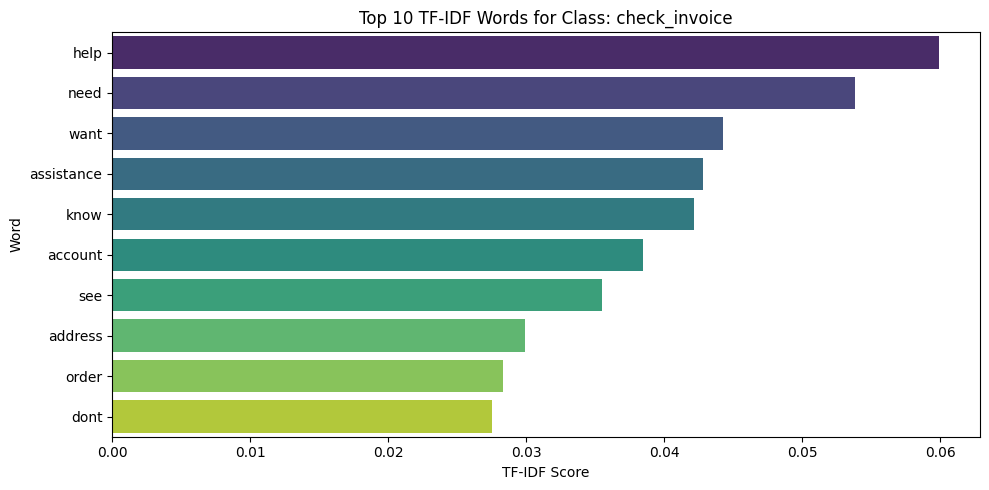

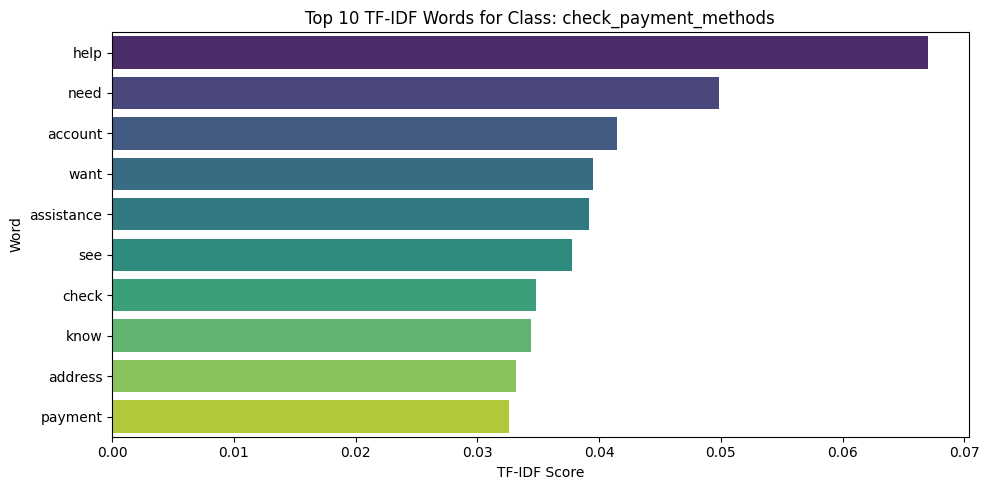

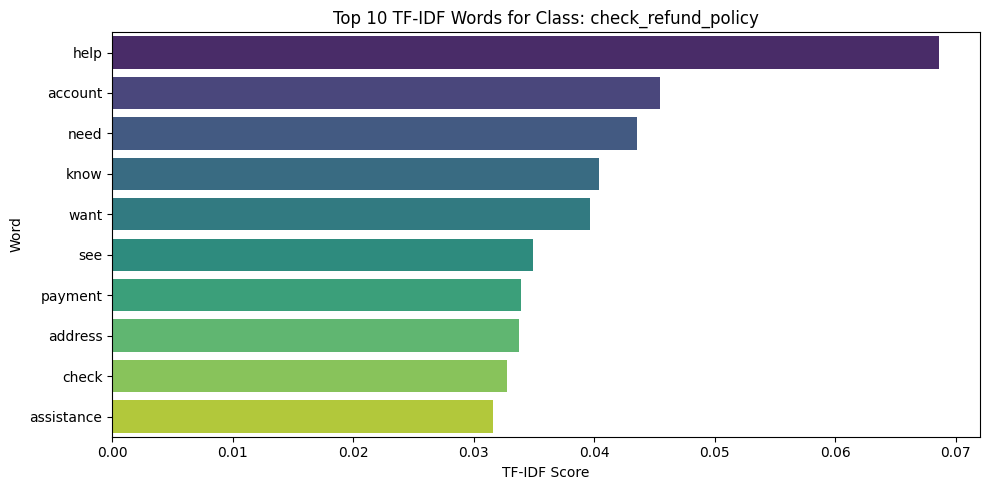

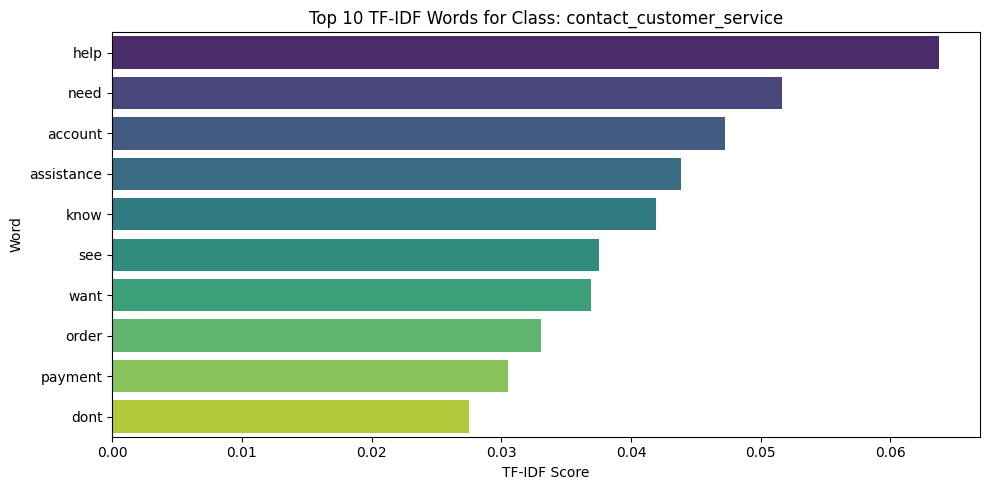

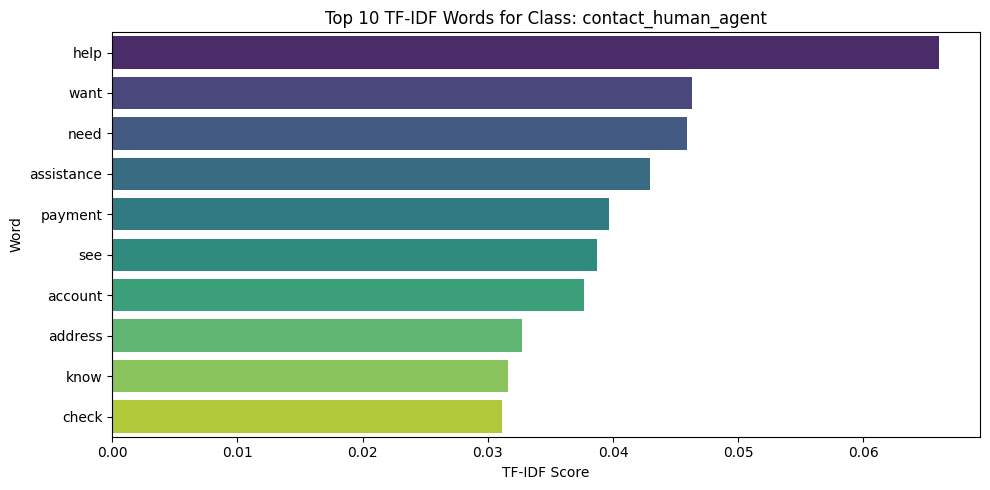

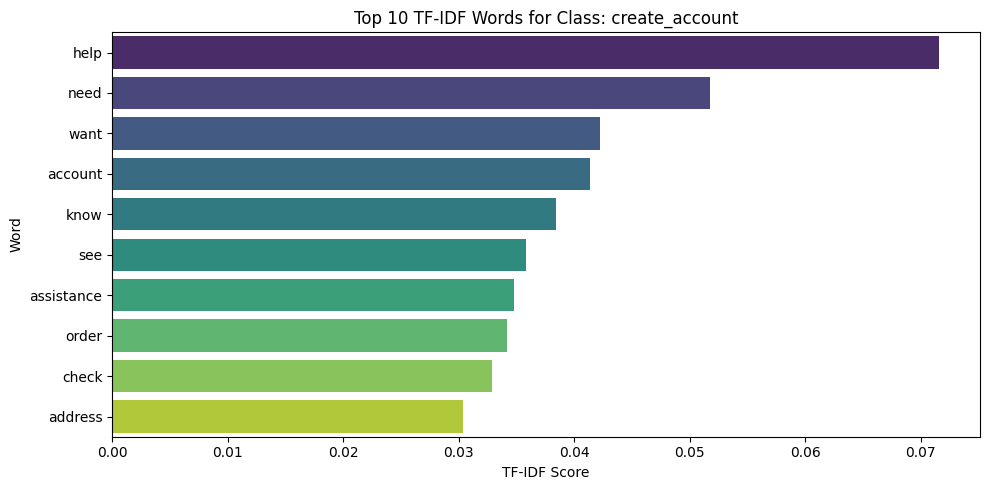

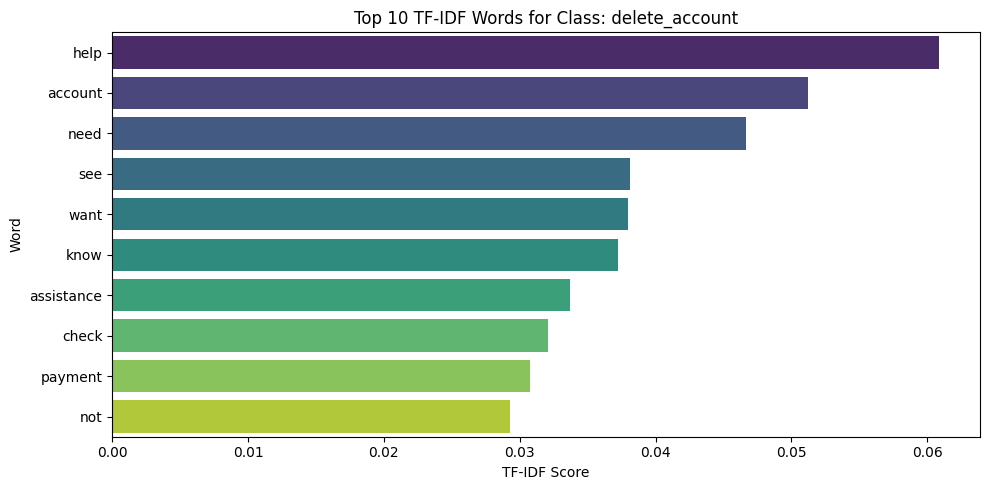

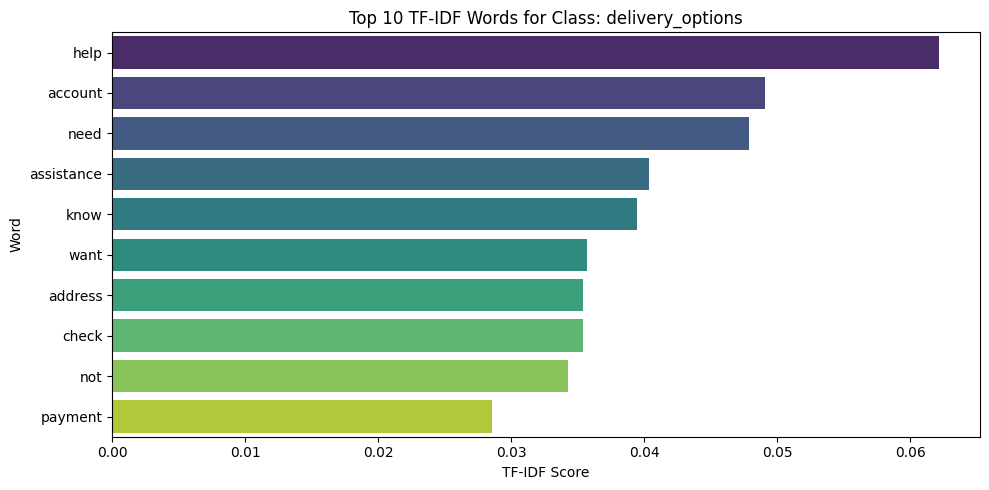

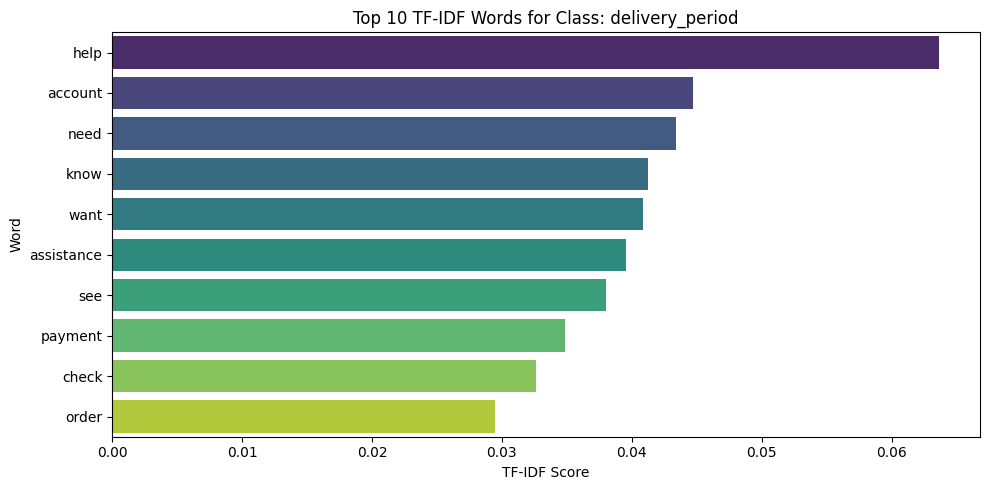

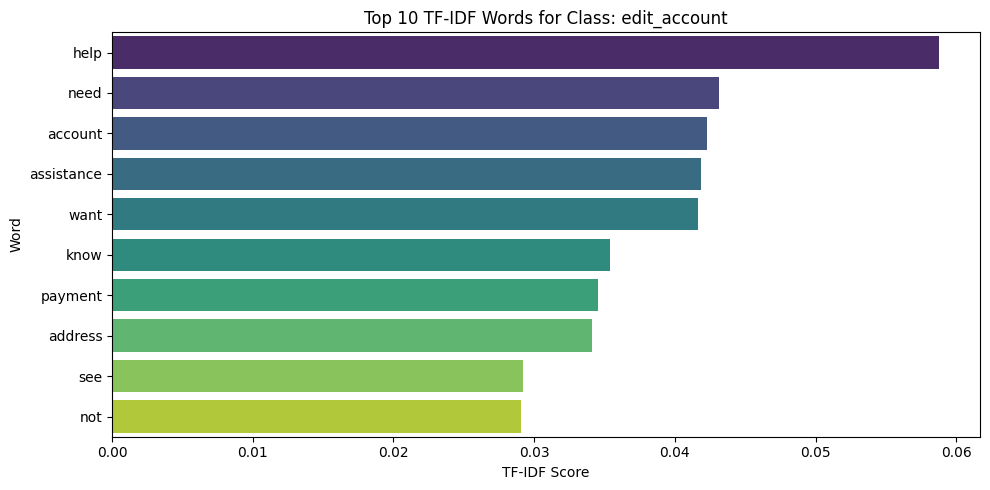

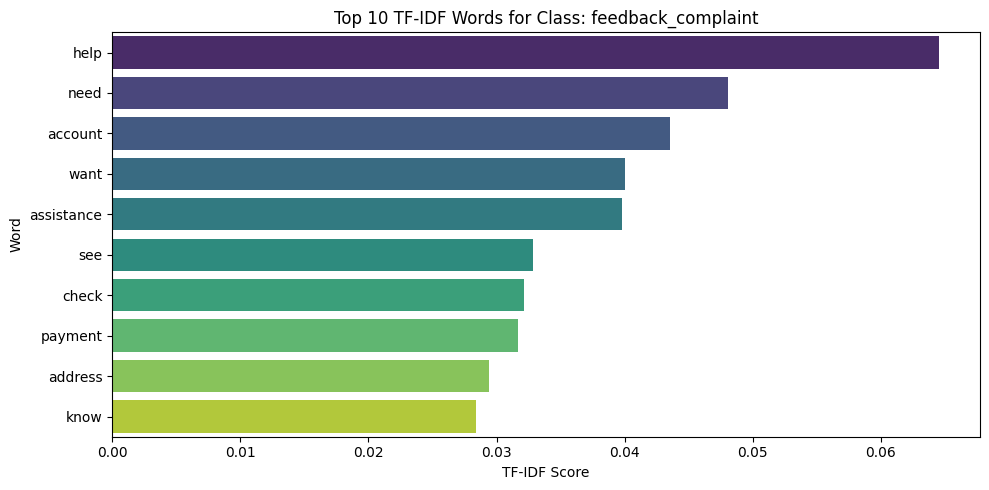

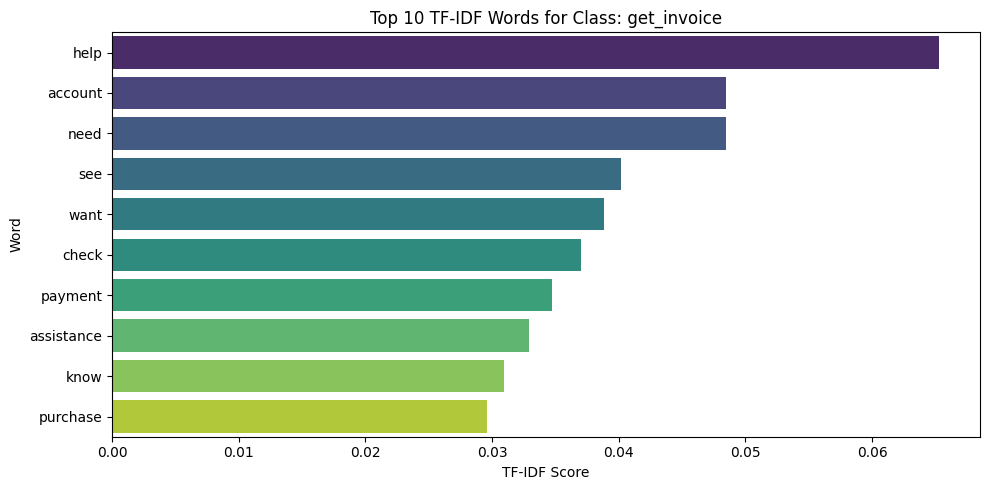

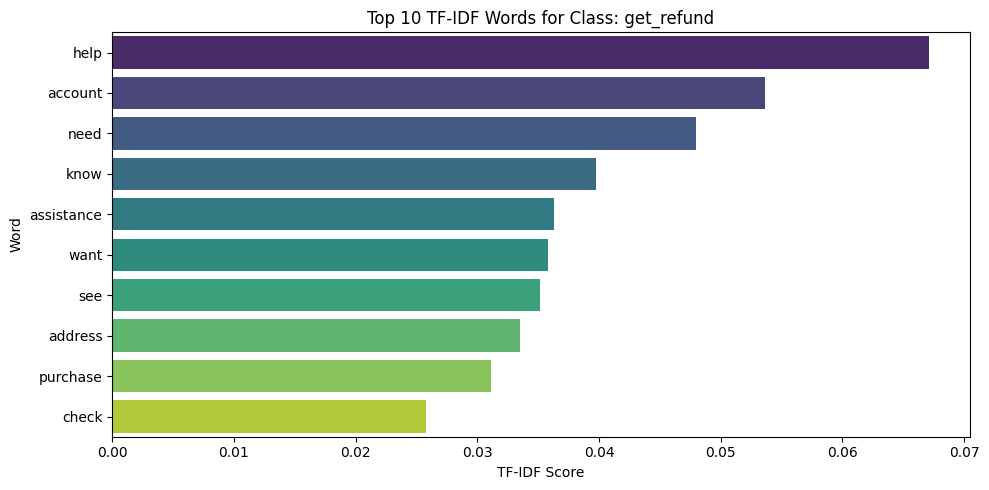

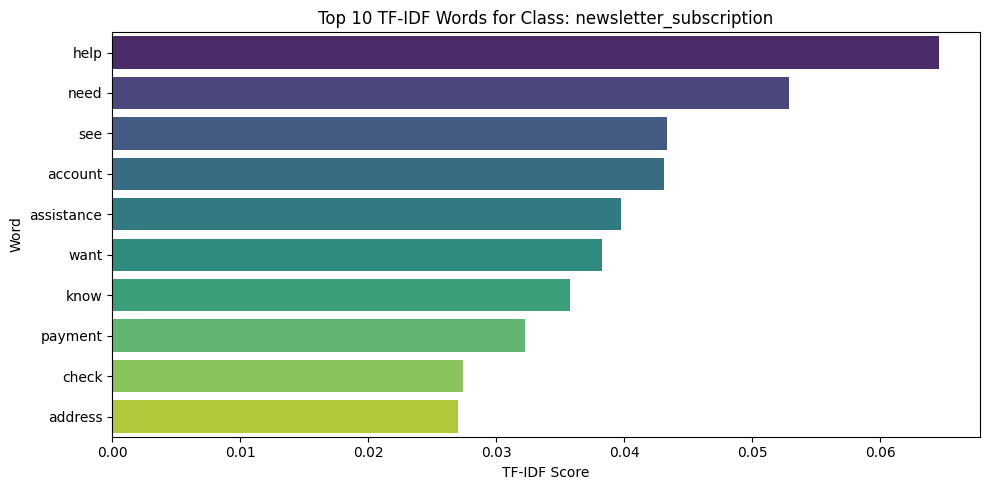

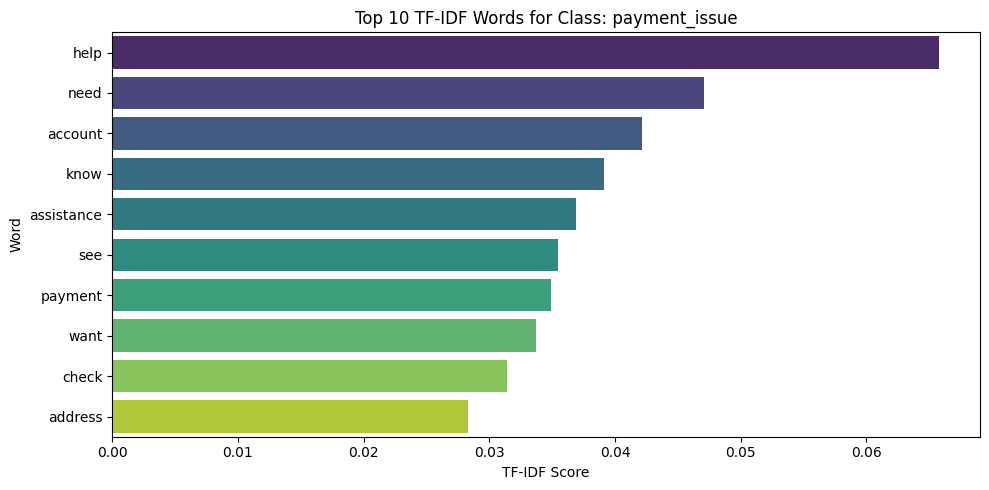

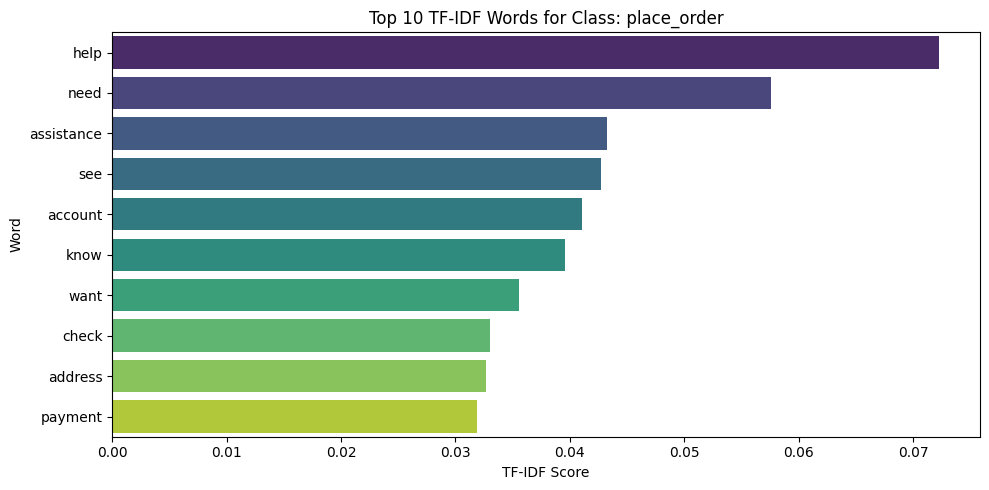

In [ ]:
# Visualize Bar Plots
for new_intent, top_words in top_words_per_class.items():
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_words.values, y=top_words.index, palette='viridis')
    plt.title(f'Top {top_n} TF-IDF Words for Class: {new_intent}')
    plt.xlabel('TF-IDF Score')
    plt.ylabel('Word')
    plt.tight_layout()
    plt.show()

In [ ]:
# Initialize classifiers
models = {
    "SGDClassifier": SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel='linear', probability=True, random_state=42)
}
# Track model performances
accuracies = {}
for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {acc:.4f}")

    # # Confusion matrix plot
    # cm = confusion_matrix(y_test, y_pred)
    # plt.figure(figsize=(6, 4))
    # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    # plt.title(f'{name} Confusion Matrix')
    # plt.xlabel('Predicted')
    # plt.ylabel('Actual')
    # plt.show()





=== SGDClassifier ===
                               precision    recall  f1-score   support

     account_recover_password       1.00      1.00      1.00       202
account_registration_problems       0.98      0.98      0.98       191
                 cancel_order       0.99      0.94      0.96       102
                 change_order       0.93      0.97      0.95       166
      change_shipping_address       0.99      0.99      0.99       191
       check_cancellation_fee       1.00      1.00      1.00       202
                check_invoice       0.98      1.00      0.99       211
        check_payment_methods       1.00      0.99      1.00       199
          check_refund_policy       0.99      0.99      0.99       192
     contact_customer_service       1.00      1.00      1.00       198
          contact_human_agent       1.00      1.00      1.00       211
               create_account       0.98      0.97      0.97       175
               delete_account       0.97      1.00   

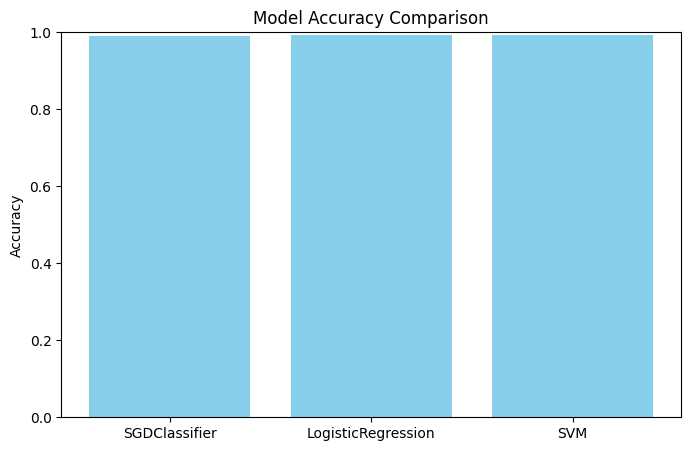

In [ ]:
# Accuracy Comparison Bar Plot
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

## Text_clean function (generlization the cleaning process)

In [ ]:
def clean_text(text) :

  # Remove curly braket
  text = re.sub(r'\{\{.*?\}\}', '', text)

  #  Expanded Text
  expanded_text = contractions.fix(text)

  # correct spelling
  blob = TextBlob(expanded_text)
  text = str(blob.correct())
  text = str(text).lower()
  text = re.sub(r'\{\{.*?\}\}', '', text)
  text = text.split()
  text = ' '.join(text)
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)


  return text
# df['cleaned_text'] = df['text'].apply(clean_text)


In [ ]:
df.head()

,new_intent,instruction
0,cancel_order,question about concealing order
1,cancel_order,i have a question about concealing order
2,cancel_order,i need help concealing purchase
3,cancel_order,I need to cancel purchase
4,cancel_order,"I cannot afford this order, cancel purchase"


## Read Data

In [ ]:
df = pd.read_csv("/content/Bitext_Sample_Customer_Support_Training_Dataset_27K_responses-v11 (1).csv")

NameError: name 'pd' is not defined

In [ ]:
df.head()

,flags,instruction,category,intent,response
0,B,question about cancelling order {{Order Number}},ORDER,cancel_order,I've understood you have a question regarding ...
1,BQZ,i have a question about cancelling oorder {{Or...,ORDER,cancel_order,I've been informed that you have a question ab...
2,BLQZ,i need help cancelling puchase {{Order Number}},ORDER,cancel_order,I can sense that you're seeking assistance wit...
3,BL,I need to cancel purchase {{Order Number}},ORDER,cancel_order,I understood that you need assistance with can...
4,BCELN,"I cannot afford this order, cancel purchase {{...",ORDER,cancel_order,I'm sensitive to the fact that you're facing f...


## Target Engineering ⭐

In [ ]:
# Select the intentes you want to concatenate them with the main Category
categories_intents = {"ACCOUNT":['registration_problems' , 'recover_password'] , "FEEDBACK" : ["complaint","review"]}

def concatenate_intents(categories_intents,text) :
  for category,intent in categories_intents.items() :
    if text in intent :
        # print(text,intent,category)
        category = category.lower()
        text = category+"_"+text
        # print(intent)
    else :
      continue

  return text


df['new_intent'] = df['intent'].apply(lambda x : concatenate_intents(categories_intents,x))

## Specify specific columns for the same problem

In [ ]:
df  = df[["new_intent",'instruction']]

In [ ]:
df.head()

,new_intent,instruction
0,cancel_order,question about cancelling order {{Order Number}}
1,cancel_order,i have a question about cancelling oorder {{Or...
2,cancel_order,i need help cancelling puchase {{Order Number}}
3,cancel_order,I need to cancel purchase {{Order Number}}
4,cancel_order,"I cannot afford this order, cancel purchase {{..."


In [ ]:
df.shape

(26872, 2)

In [ ]:
# Drop nulls and duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(24635, 2)

## Start the pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


###  Advanced Text Preprocessing :

In [ ]:
stop_words = set(stopwords.words("english"))
essential_words = {'not', 'no', 'cannot'}
custom_stop_words = stop_words - essential_words

In [ ]:
# 🔹 1. Advanced Text Preprocessing Function
def clean_text_advanced(text):
    # Expand contractions
    text = contractions.fix(text)

    # Lowercase
    text = text.lower()

    # Remove digits and punctuation
    text = re.sub(r'\{\{.*?\}\}', '', text)

    text = text.split()
    text = ' '.join(text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)

     # Tokenize text
    tokens = word_tokenize(text)

    # Lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token,pos='v') for token in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos ='v') for token in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos ='a') for token in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos ='r') for token in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos ='s') for token in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos ='n') for token in tokens]

    # Join tokens back into a string
    cleaned_text = ' '.join(lemmatized_tokens)

    # Optional: Spell correction (can slow down processing)
    cleaned_text = str(TextBlob(cleaned_text).correct())



    return cleaned_text

### Splitting Data (Features and target)

In [ ]:
# Features and target (keep as text for now)
x = df[['instruction']]
y = df['new_intent']

In [ ]:
x.head()

,instruction
0,question about cancelling order {{Order Number}}
1,i have a question about cancelling oorder {{Or...
2,i need help cancelling puchase {{Order Number}}
3,I need to cancel purchase {{Order Number}}
4,"I cannot afford this order, cancel purchase {{..."


In [ ]:
y.head()

,new_intent
0,cancel_order
1,cancel_order
2,cancel_order
3,cancel_order
4,cancel_order


### Splitting Data befor encoding our target

In [ ]:
# Split data BEFORE encoding
temp_x_train, temp_x_test, temp_y_train, temp_y_test = train_test_split(x, y, test_size=0.2, random_state=42)


###  Label Encoding (On terget)

In [ ]:
# Encode y AFTER splitting
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(temp_y_train)
y_test = label_encoder.transform(temp_y_test)
x_train = temp_x_train
x_test = temp_x_test

###  Push Our advanced TextPreprocessing and Classifier

In [ ]:
# Preprocessor for text column using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('text_tfidf', TfidfVectorizer(max_features = 1000 ,preprocessor=clean_text_advanced, stop_words=list(custom_stop_words)), 'instruction')
])

### Modeling

In [ ]:
# Build full pipeline with classifier
pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42))
])

### Fit Our Pipeline

In [ ]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('text_tfidf',
                                                  TfidfVectorizer(max_features=1000,
                                                                  preprocessor=<function clean_text_advanced at 0x7ca1db2863e0>,
                                                                  stop_words=["it'd",
                                                                              'be',
                                                                              'won',
                                                                              'am',
                                                                              'whom',
                                                                              "we're",
                                                                              "i've",
                                                                              'yourself',
                                                                              'of',
                                                                              "shouldn't",
                                                                              "mustn't",
                                                                              'were',
                                                                              "he'll",
                                                                              'because',
                                                                              'does',
                                                                              'same',
                                                                              'mustn',
                                                                              "needn't",
                                                                              'can',
                                                                              'he',
                                                                              'about',
                                                                              'herself',
                                                                              's',
                                                                              'each',
                                                                              'or',
                                                                              'hadn',
                                                                              "wouldn't",
                                                                              'very',
                                                                              'is',
                                                                              "he'd", ...]),
                                                  'instruction')])),
                ('clf', SGDClassifier(loss='log_loss', random_state=42))])

### Evaluate the Model

In [ ]:
# Evaluate Model
y_pred = pipeline.predict(x_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))



Accuracy: 0.9890399837629389

Classification Report:
                                precision    recall  f1-score   support

     account_recover_password       1.00      1.00      1.00       202
account_registration_problems       0.98      0.98      0.98       191
                 cancel_order       0.99      0.93      0.96       102
                 change_order       0.91      0.97      0.94       166
      change_shipping_address       0.99      0.99      0.99       191
       check_cancellation_fee       1.00      1.00      1.00       202
                check_invoice       0.98      1.00      0.99       211
        check_payment_methods       1.00      0.99      1.00       199
          check_refund_policy       0.99      0.99      0.99       192
     contact_customer_service       1.00      0.99      1.00       198
          contact_human_agent       1.00      1.00      1.00       211
               create_account       0.98      0.97      0.98       175
               delete

### Save the Model and Label Encoding :

In [ ]:
import joblib

In [ ]:
# Save Model + Label Encoder
joblib.dump(pipeline, 'text_classification_pipeline.joblib')
joblib.dump(label_encoder, 'label_encoder.joblib')
print("\nModel and Label Encoder saved!")


Model and Label Encoder saved!


### Load Model and Encoding , Test on Outsource Data

In [ ]:
# Load Model and Predict New Example
loaded_model = joblib.load('text_classification_pipeline.joblib')
loaded_encoder = joblib.load('label_encoder.joblib')

new_data = pd.DataFrame({'instruction': ["I want to change my billing details."]})
pred_encoded = loaded_model.predict(new_data)
pred_label = loaded_encoder.inverse_transform(pred_encoded)
print("\nPredicted Category for New Instruction:", pred_label[0])


Predicted Category for New Instruction: edit_account


In [ ]:
import pandas as pd

test_df = pd.DataFrame({
    'instruction': [
        "I want to cancel my order as soon as possible.",
        "Can you help me track my recent order?",
        "Please assist me with changing my shipping address.",
        "How do I get a refund for my purchase?",
        "I forgot my password and can't log into my account.",
        "Where can I see available delivery options?",
        "I need to set up a new shipping address.",
        "I'd like to delete my account permanently.",
        "Help me with payment issues during checkout.",
        "How can I contact a human agent for support?"
    ],
    'intent': [
        "cancel_order",
        "track_order",
        "change_shipping_address",
        "get_refund",
        "recover_password",
        "delivery_options",
        "set_up_shipping_address",
        "delete_account",
        "payment_issue",
        "contact_human_agent"
    ]
})

# Display
test_df.head()

,instruction,intent
0,I want to cancel my order as soon as possible.,cancel_order
1,Can you help me track my recent order?,track_order
2,Please assist me with changing my shipping add...,change_shipping_address
3,How do I get a refund for my purchase?,get_refund
4,I forgot my password and can't log into my acc...,recover_password


In [ ]:
# Predict using the loaded model
pred_test_encoded = loaded_model.predict(test_df[['instruction']])
pred_test_labels = loaded_encoder.inverse_transform(pred_test_encoded)
test_df['predicted_label'] = pred_test_labels

print("\nSample Predictions:\n")
print(test_df[['instruction', 'intent', 'predicted_label']])


Sample Predictions:

                                         instruction                   intent  \
0     I want to cancel my order as soon as possible.             cancel_order   
1             Can you help me track my recent order?              track_order   
2  Please assist me with changing my shipping add...  change_shipping_address   
3             How do I get a refund for my purchase?               get_refund   
4  I forgot my password and can't log into my acc...         recover_password   
5        Where can I see available delivery options?         delivery_options   
6           I need to set up a new shipping address.  set_up_shipping_address   
7         I'd like to delete my account permanently.           delete_account   
8       Help me with payment issues during checkout.            payment_issue   
9       How can I contact a human agent for support?      contact_human_agent   

            predicted_label  
0              cancel_order  
1               track_orde

In [ ]:
correct = 0
for i in range(len(test_df)):
        original_text = test_df.iloc[i]['instruction']
        expected = test_df.iloc[i]['intent']
        predicted = test_df.iloc[i]['predicted_label']
        is_correct = predicted == expected
        correct += is_correct
        print(f"Original Text: {original_text}")
        print(f"Expected Label: {expected} | Predicted Label: {predicted} | {'Correct' if is_correct else 'Wrong'}")
        print("---")

accuracy = correct / len(test_df)
print(f"Model Accuracy on Test Samples: {accuracy:.2f}")

Original Text: I want to cancel my order as soon as possible.
Expected Label: cancel_order | Predicted Label: cancel_order | Correct
---
Original Text: Can you help me track my recent order?
Expected Label: track_order | Predicted Label: track_order | Correct
---
Original Text: Please assist me with changing my shipping address.
Expected Label: change_shipping_address | Predicted Label: change_shipping_address | Correct
---
Original Text: How do I get a refund for my purchase?
Expected Label: get_refund | Predicted Label: get_refund | Correct
---
Original Text: I forgot my password and can't log into my account.
Expected Label: recover_password | Predicted Label: account_recover_password | Wrong
---
Original Text: Where can I see available delivery options?
Expected Label: delivery_options | Predicted Label: delivery_options | Correct
---
Original Text: I need to set up a new shipping address.
Expected Label: set_up_shipping_address | Predicted Label: set_up_shipping_address | Correct


### Try on Complex Compliant

In [ ]:
test_df_complex = pd.DataFrame({
    'instruction': [
        "I want to cancel my order and get a refund because I never received it.",
        "Can you help me track my recent order? Also, I need to change my shipping address.",
        "I forgot my password and now my payment isn't going through. Help!",
        "Where can I see available delivery options? Also, I'd like to delete my account permanently.",
        "I tried to contact support, but no human agent responded. My payment also failed!",
    ],
    'intent': [
        ["cancel_order", "get_refund"],
        ["track_order", "change_shipping_address"],
        ["recover_password", "payment_issue"],
        ["delivery_options", "delete_account"],
        ["contact_human_agent", "payment_issue"]
    ]
})

test_df_complex


,instruction,intent
0,I want to cancel my order and get a refund bec...,"[cancel_order, get_refund]"
1,"Can you help me track my recent order? Also, I...","[track_order, change_shipping_address]"
2,I forgot my password and now my payment isn't ...,"[recover_password, payment_issue]"
3,Where can I see available delivery options? Al...,"[delivery_options, delete_account]"
4,"I tried to contact support, but no human agent...","[contact_human_agent, payment_issue]"


In [ ]:
# Predict using the loaded model
pred_test_encoded = loaded_model.predict(test_df_complex[['instruction']])
pred_test_labels = loaded_encoder.inverse_transform(pred_test_encoded)
test_df_complex['predicted_label'] = pred_test_labels

print("\nSample Predictions:\n")
test_df_complex
print(test_df_complex[['instruction', 'intent', 'predicted_label']])


Sample Predictions:

                                         instruction  \
0  I want to cancel my order and get a refund bec...   
1  Can you help me track my recent order? Also, I...   
2  I forgot my password and now my payment isn't ...   
3  Where can I see available delivery options? Al...   
4  I tried to contact support, but no human agent...   

                                   intent           predicted_label  
0              [cancel_order, get_refund]              cancel_order  
1  [track_order, change_shipping_address]   change_shipping_address  
2       [recover_password, payment_issue]  account_recover_password  
3      [delivery_options, delete_account]          delivery_options  
4    [contact_human_agent, payment_issue]       contact_human_agent  


In [ ]:
correct = 0
for i in range(len(test_df_complex)):
        original_text = test_df_complex.iloc[i]['instruction']
        expected = test_df_complex.iloc[i]['intent']
        predicted = test_df_complex.iloc[i]['predicted_label']
        if predicted in expected:
            is_correct = True

        # is_correct = predicted == expected
        correct += is_correct
        print(f"Original Text: {original_text}")
        print(f"Expected Label: {expected} | Predicted Label: {predicted} | {'Correct' if is_correct else 'Wrong'}")
        print("---")

accuracy = correct / len(test_df_complex)
print(f"Model Accuracy on Test Samples: {accuracy:.2f}")

Original Text: I want to cancel my order and get a refund because I never received it.
Expected Label: ['cancel_order', 'get_refund'] | Predicted Label: cancel_order | Correct
---
Original Text: Can you help me track my recent order? Also, I need to change my shipping address.
Expected Label: ['track_order', 'change_shipping_address'] | Predicted Label: change_shipping_address | Correct
---
Original Text: I forgot my password and now my payment isn't going through. Help!
Expected Label: ['recover_password', 'payment_issue'] | Predicted Label: account_recover_password | Correct
---
Original Text: Where can I see available delivery options? Also, I'd like to delete my account permanently.
Expected Label: ['delivery_options', 'delete_account'] | Predicted Label: delivery_options | Correct
---
Original Text: I tried to contact support, but no human agent responded. My payment also failed!
Expected Label: ['contact_human_agent', 'payment_issue'] | Predicted Label: contact_human_agent | Corr

In [ ]:
x_test_vectorized = vectorizer.transform(test_df_complex[['instruction']])
probs = model.predict_proba(x_test_vectorized)

# Print probabilities
print(probs)
# model.predict_proba(test_df_complex[['instruction']])
print(probs.sum())

[[0.0248291  0.02260062 0.00956606 0.08887852 0.01988913 0.01319949
  0.2025907  0.01341123 0.01726854 0.02078251 0.05834537 0.02501548
  0.02651367 0.06693612 0.0140737  0.02846555 0.00816911 0.01064542
  0.06669788 0.12726708 0.00966785 0.01314288 0.0508393  0.00291619
  0.01109709 0.02695699 0.02023443]]
0.9999999999999993


In [ ]:
x_test_vectorized = vectorizer.transform(x_test)
probs = model.predict_proba(x_test_vectorized)

# Print probabilities
print(probs)

[[0.0248291  0.02260062 0.00956606 0.08887852 0.01988913 0.01319949
  0.2025907  0.01341123 0.01726854 0.02078251 0.05834537 0.02501548
  0.02651367 0.06693612 0.0140737  0.02846555 0.00816911 0.01064542
  0.06669788 0.12726708 0.00966785 0.01314288 0.0508393  0.00291619
  0.01109709 0.02695699 0.02023443]]
